# Beamforming-Daten Analyse und Visualisierung

Dieses Notebook analysiert die komprimierten Beamforming-Feedback-Daten aus der Parquet-Datei und erstellt verschiedene Visualisierungen über den zeitlichen Verlauf.

## 1. Setup und Datenladen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Setze Stil für bessere Visualisierungen
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except OSError:
    try:
        plt.style.use('seaborn-darkgrid')
    except OSError:
        plt.style.use('default')
sns.set_palette("husl")

# Für größere Plots
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("Bibliotheken erfolgreich importiert!")

Bibliotheken erfolgreich importiert!


In [2]:
# Lade Parquet-Datei
parquet_file = 'ekin_kammi_esko_in_chair_andi_comes_in_goes_to_sauna_and_back_to_the_room.parquet'
df = pd.read_parquet(parquet_file)

# Extrahiere Basename für Video-Export
parquet_basename = Path(parquet_file).stem  # Ohne .parquet Extension
print(f"Basename für Export: {parquet_basename}")

print(f"Daten erfolgreich geladen: {len(df)} Einträge")
print(f"\nSpalten: {list(df.columns)}")
print(f"\nErste Zeilen:")
df.head()

Basename für Export: ekin_kammi_esko_in_chair_andi_comes_in_goes_to_sauna_and_back_to_the_room
Daten erfolgreich geladen: 4212 Einträge

Spalten: ['timestamp', 'timestamp_delta', 'frame_number', 'scidx', 'ta', 'ra', 'bssid', 'nr', 'nc', 'channel_width', 'phi', 'psi', 'phi_mask', 'psi_mask']

Erste Zeilen:


,timestamp,timestamp_delta,frame_number,scidx,ta,ra,bssid,nr,nc,channel_width,phi,psi,phi_mask,psi_mask
0,1.768563e+09,0.0,1,-122,36:72:f0:2b:0e:87,20:05:b6:ff:e4:49,20:05:b6:ff:e4:49,3,3,80,"[0.12698412698412698, 0.20634920634920634, -1....","[1.2857142857142858, 1.0, -1.0, -1.0]","[1, 1, 0, 0, 0, 0]","[1, 1, 0, 0]"
1,1.768563e+09,0.0,1,-121,36:72:f0:2b:0e:87,20:05:b6:ff:e4:49,20:05:b6:ff:e4:49,3,3,80,"[0.14285714285714285, 0.2222222222222222, -1.0...","[1.2857142857142858, 1.0, -1.0, -1.0]","[1, 1, 0, 0, 0, 0]","[1, 1, 0, 0]"
2,1.768563e+09,0.0,1,-120,36:72:f0:2b:0e:87,20:05:b6:ff:e4:49,20:05:b6:ff:e4:49,3,3,80,"[0.15873015873015872, 0.2222222222222222, -1.0...","[1.2857142857142858, 1.0, -1.0, -1.0]","[1, 1, 0, 0, 0, 0]","[1, 1, 0, 0]"
3,1.768563e+09,0.0,1,-119,36:72:f0:2b:0e:87,20:05:b6:ff:e4:49,20:05:b6:ff:e4:49,3,3,80,"[0.15873015873015872, 0.20634920634920634, -1....","[1.2857142857142858, 1.0, -1.0, -1.0]","[1, 1, 0, 0, 0, 0]","[1, 1, 0, 0]"
4,1.768563e+09,0.0,1,-118,36:72:f0:2b:0e:87,20:05:b6:ff:e4:49,20:05:b6:ff:e4:49,3,3,80,"[0.15873015873015872, 0.2222222222222222, -1.0...","[1.2857142857142858, 1.0, -1.0, -1.0]","[1, 1, 0, 0, 0, 0]","[1, 1, 0, 0]"


In [3]:
# Grundlegende Statistiken
print("=== Datenübersicht ===")
print(f"Anzahl Einträge: {len(df):,}")
print(f"Anzahl eindeutige Frames: {df['frame_number'].nunique():,}")
print(f"Anzahl eindeutige Subcarrier: {df['scidx'].nunique():,}")
print(f"\nZeitbereich:")
print(f"  Start: {df['timestamp'].min():.3f} (Delta: {df['timestamp_delta'].min():.3f}s)")
print(f"  Ende: {df['timestamp'].max():.3f} (Delta: {df['timestamp_delta'].max():.3f}s)")
print(f"  Dauer: {df['timestamp_delta'].max() - df['timestamp_delta'].min():.3f} Sekunden")
print(f"\nSubcarrier-Bereich: {df['scidx'].min()} bis {df['scidx'].max()}")
print(f"\nMIMO-Parameter:")
print(f"  Nr (Antennen): {df['nr'].unique()}")
print(f"  Nc (Streams): {df['nc'].unique()}")
print(f"  Channel Width: {df['channel_width'].unique()} MHz")
print(f"\nMAC-Adressen:")
print(f"  Transmitter (TA): {df['ta'].nunique()} eindeutige")
print(f"  Receiver (RA): {df['ra'].nunique()} eindeutige")
print(f"  BSSID: {df['bssid'].nunique()} eindeutige")

=== Datenübersicht ===
Anzahl Einträge: 4,212
Anzahl eindeutige Frames: 18
Anzahl eindeutige Subcarrier: 234

Zeitbereich:
  Start: 1768563081.275 (Delta: 0.000s)
  Ende: 1768563144.782 (Delta: 63.507s)
  Dauer: 63.507 Sekunden

Subcarrier-Bereich: -122 bis 122

MIMO-Parameter:
  Nr (Antennen): [3]
  Nc (Streams): [3]
  Channel Width: [80] MHz

MAC-Adressen:
  Transmitter (TA): 1 eindeutige
  Receiver (RA): 1 eindeutige
  BSSID: 1 eindeutige


In [4]:
# Prüfe Datenqualität
print("=== Datenqualität ===")
print(f"Fehlende Werte:")
print(df.isnull().sum())
print(f"\nDatentypen:")
print(df.dtypes)

=== Datenqualität ===
Fehlende Werte:
timestamp          0
timestamp_delta    0
frame_number       0
scidx              0
ta                 0
ra                 0
bssid              0
nr                 0
nc                 0
channel_width      0
phi                0
psi                0
phi_mask           0
psi_mask           0
dtype: int64

Datentypen:
timestamp          float64
timestamp_delta    float64
frame_number         int64
scidx                int64
ta                  object
ra                  object
bssid               object
nr                   int64
nc                   int64
channel_width        int64
phi                 object
psi                 object
phi_mask            object
psi_mask            object
dtype: object


## 2. Datenvorbereitung

In [5]:
# Konvertiere Timestamps zu datetime (optional, für bessere Zeitdarstellung)
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Sortiere nach Zeit
df = df.sort_values('timestamp_delta').reset_index(drop=True)

print("Daten sortiert und vorbereitet!")

Daten sortiert und vorbereitet!


In [6]:
# Extrahiere gültige Phi/Psi-Werte unter Verwendung der Masken
def extract_valid_angles(row, angle_type='phi'):
    """Extrahiert gültige Winkelwerte basierend auf Maske."""
    angles = row[angle_type]
    mask = row[f'{angle_type}_mask']
    valid_angles = [a for a, m in zip(angles, mask) if m == 1 and a >= 0]
    return valid_angles

# Erstelle Spalten mit gültigen Werten
df['phi_valid'] = df.apply(lambda row: extract_valid_angles(row, 'phi'), axis=1)
df['psi_valid'] = df.apply(lambda row: extract_valid_angles(row, 'psi'), axis=1)

# Extrahiere einzelne Phi/Psi-Werte für einfachere Analyse
df['phi_0'] = df['phi'].apply(lambda x: x[0] if len(x) > 0 and x[0] >= 0 else np.nan)
df['phi_1'] = df['phi'].apply(lambda x: x[1] if len(x) > 1 and x[1] >= 0 else np.nan)
df['psi_0'] = df['psi'].apply(lambda x: x[0] if len(x) > 0 and x[0] >= 0 else np.nan)
df['psi_1'] = df['psi'].apply(lambda x: x[1] if len(x) > 1 and x[1] >= 0 else np.nan)

print("Gültige Winkelwerte extrahiert!")

Gültige Winkelwerte extrahiert!


In [7]:
# Aggregiere Daten pro Frame (für Zeitreihen-Analyse)
frame_stats = df.groupby('frame_number').agg({
    'timestamp_delta': 'first',
    'timestamp': 'first',
    'phi_0': ['mean', 'std', 'min', 'max'],
    'phi_1': ['mean', 'std', 'min', 'max'],
    'psi_0': ['mean', 'std', 'min', 'max'],
    'psi_1': ['mean', 'std', 'min', 'max'],
    'scidx': 'count'  # Anzahl Subcarrier pro Frame
}).reset_index()

# Flache Spaltennamen
frame_stats.columns = ['frame_number', 'timestamp_delta', 'timestamp',
                       'phi_0_mean', 'phi_0_std', 'phi_0_min', 'phi_0_max',
                       'phi_1_mean', 'phi_1_std', 'phi_1_min', 'phi_1_max',
                       'psi_0_mean', 'psi_0_std', 'psi_0_min', 'psi_0_max',
                       'psi_1_mean', 'psi_1_std', 'psi_1_min', 'psi_1_max',
                       'subcarrier_count']

print(f"Aggregierte Statistiken für {len(frame_stats)} Frames erstellt!")
frame_stats.head()

Aggregierte Statistiken für 18 Frames erstellt!


,frame_number,timestamp_delta,timestamp,phi_0_mean,phi_0_std,phi_0_min,phi_0_max,phi_1_mean,phi_1_std,phi_1_min,phi_1_max,psi_0_mean,psi_0_std,psi_0_min,psi_0_max,psi_1_mean,psi_1_std,psi_1_min,psi_1_max,subcarrier_count
0,1,0.000000,1.768563e+09,0.502239,0.239474,0.126984,0.841270,0.365283,0.118130,0.206349,0.555556,0.998168,0.361374,0.428571,1.428571,0.669719,0.194121,0.285714,1.000000,234
1,2,4.265518,1.768563e+09,0.505969,0.240963,0.158730,0.841270,0.371456,0.133381,0.222222,0.587302,0.876068,0.310243,0.285714,1.285714,0.697192,0.212315,0.285714,1.000000,234
2,3,9.457155,1.768563e+09,0.494438,0.234993,0.142857,0.841270,0.364672,0.120140,0.222222,0.571429,0.896215,0.335421,0.285714,1.285714,0.689255,0.196718,0.285714,1.000000,234
3,4,10.198395,1.768563e+09,0.508818,0.244259,0.126984,0.841270,0.373084,0.124952,0.238095,0.571429,0.968254,0.393568,0.285714,1.428571,0.731380,0.187330,0.285714,1.000000,234
4,5,13.670730,1.768563e+09,0.476055,0.239664,0.158730,0.825397,0.358296,0.149327,0.174603,0.587302,0.960317,0.252680,0.571429,1.285714,0.681319,0.231060,0.142857,1.142857,234


## 3. Zeitreihen-Visualisierungen

### 3.1 Aggregierte Phi/Psi-Werte über Zeit

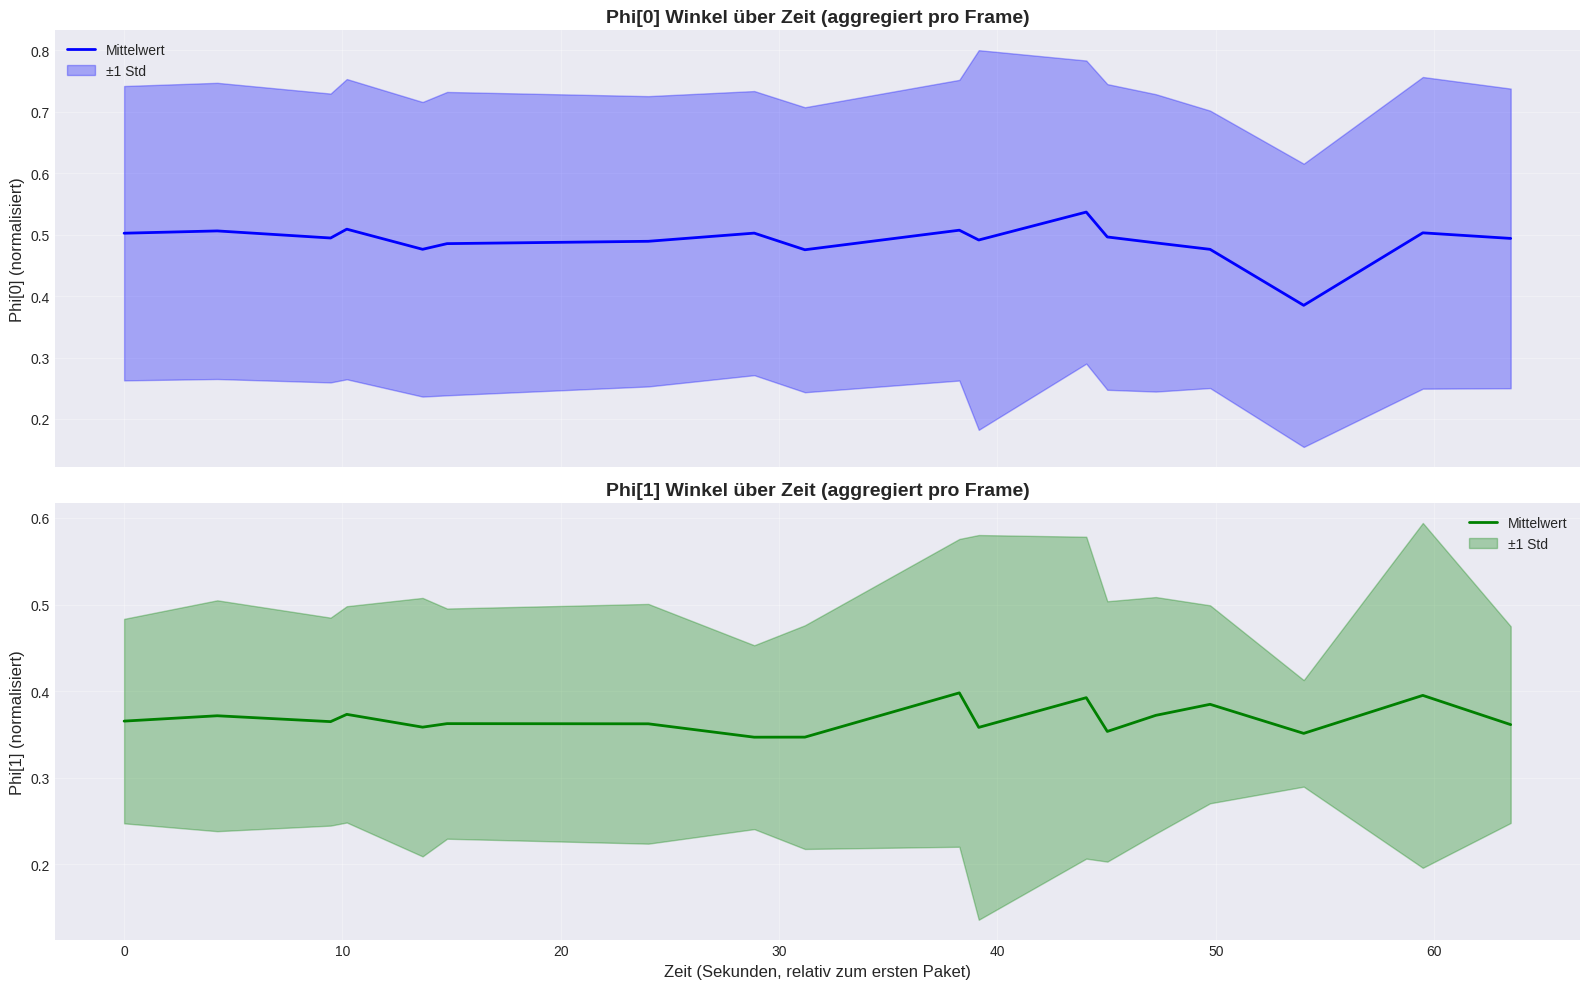

In [8]:
# Plot für Phi-Werte über Zeit
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Phi[0] über Zeit
ax = axes[0]
ax.plot(frame_stats['timestamp_delta'], frame_stats['phi_0_mean'], 
        label='Mittelwert', linewidth=2, color='blue')
ax.fill_between(frame_stats['timestamp_delta'], 
                frame_stats['phi_0_mean'] - frame_stats['phi_0_std'],
                frame_stats['phi_0_mean'] + frame_stats['phi_0_std'],
                alpha=0.3, label='±1 Std', color='blue')
ax.set_ylabel('Phi[0] (normalisiert)', fontsize=12)
ax.set_title('Phi[0] Winkel über Zeit (aggregiert pro Frame)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Phi[1] über Zeit
ax = axes[1]
ax.plot(frame_stats['timestamp_delta'], frame_stats['phi_1_mean'], 
        label='Mittelwert', linewidth=2, color='green')
ax.fill_between(frame_stats['timestamp_delta'], 
                frame_stats['phi_1_mean'] - frame_stats['phi_1_std'],
                frame_stats['phi_1_mean'] + frame_stats['phi_1_std'],
                alpha=0.3, label='±1 Std', color='green')
ax.set_xlabel('Zeit (Sekunden, relativ zum ersten Paket)', fontsize=12)
ax.set_ylabel('Phi[1] (normalisiert)', fontsize=12)
ax.set_title('Phi[1] Winkel über Zeit (aggregiert pro Frame)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

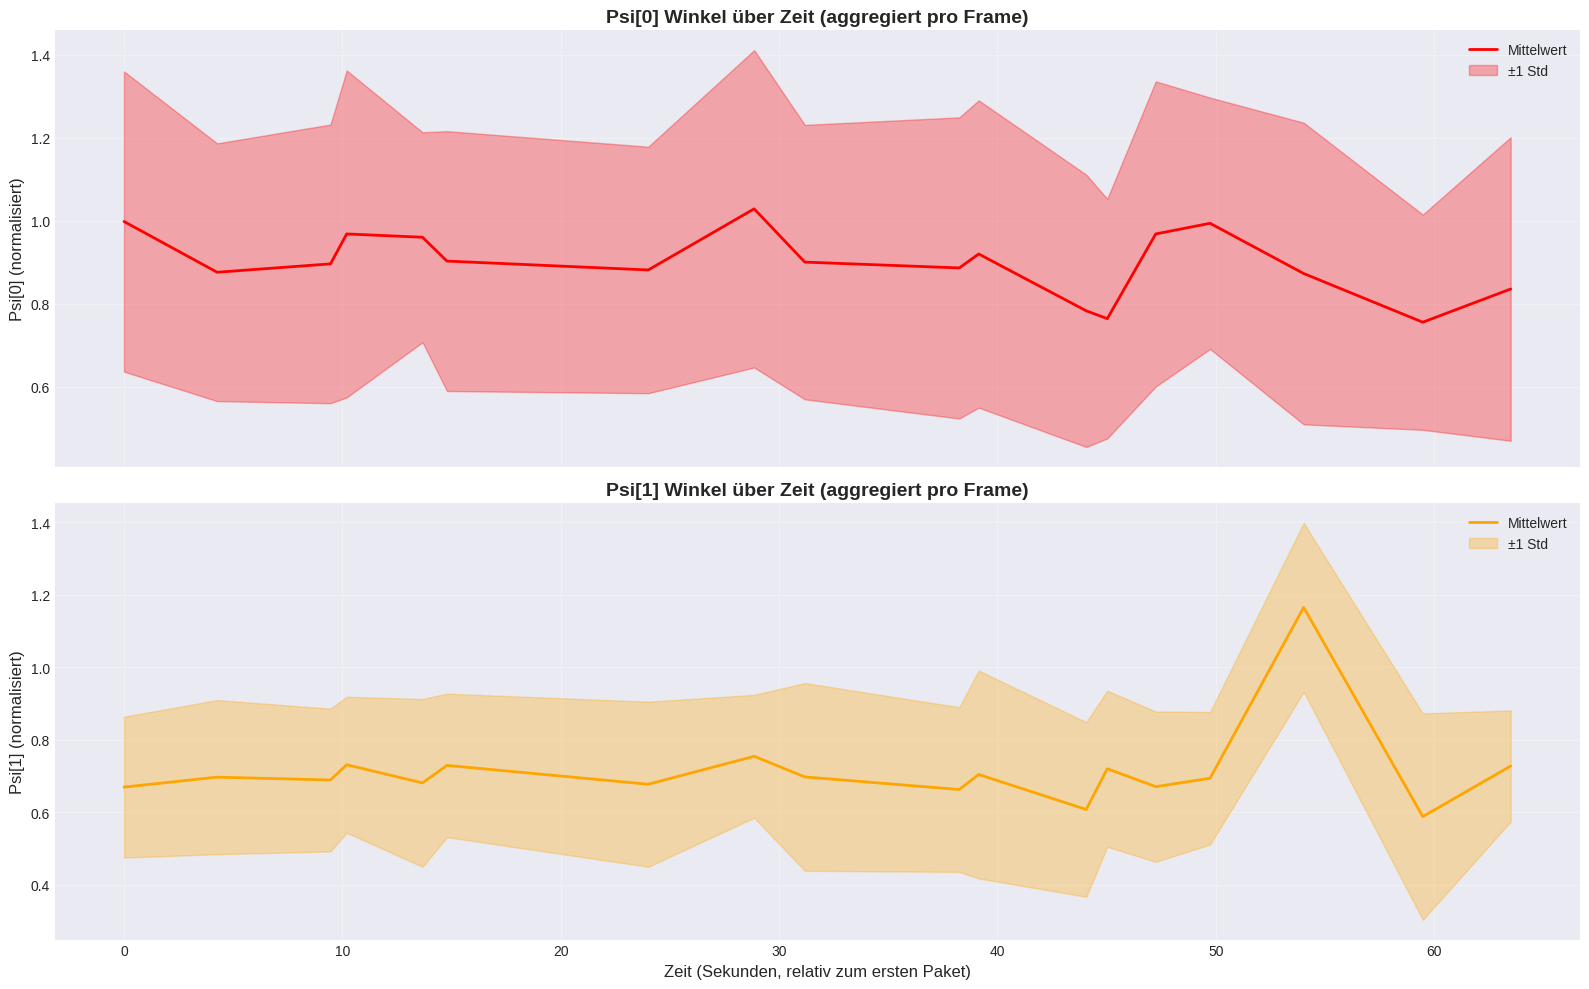

In [9]:
# Plot für Psi-Werte über Zeit
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Psi[0] über Zeit
ax = axes[0]
ax.plot(frame_stats['timestamp_delta'], frame_stats['psi_0_mean'], 
        label='Mittelwert', linewidth=2, color='red')
ax.fill_between(frame_stats['timestamp_delta'], 
                frame_stats['psi_0_mean'] - frame_stats['psi_0_std'],
                frame_stats['psi_0_mean'] + frame_stats['psi_0_std'],
                alpha=0.3, label='±1 Std', color='red')
ax.set_ylabel('Psi[0] (normalisiert)', fontsize=12)
ax.set_title('Psi[0] Winkel über Zeit (aggregiert pro Frame)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Psi[1] über Zeit
ax = axes[1]
ax.plot(frame_stats['timestamp_delta'], frame_stats['psi_1_mean'], 
        label='Mittelwert', linewidth=2, color='orange')
ax.fill_between(frame_stats['timestamp_delta'], 
                frame_stats['psi_1_mean'] - frame_stats['psi_1_std'],
                frame_stats['psi_1_mean'] + frame_stats['psi_1_std'],
                alpha=0.3, label='±1 Std', color='orange')
ax.set_xlabel('Zeit (Sekunden, relativ zum ersten Paket)', fontsize=12)
ax.set_ylabel('Psi[1] (normalisiert)', fontsize=12)
ax.set_title('Psi[1] Winkel über Zeit (aggregiert pro Frame)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Alle Phi/Psi-Werte in einem Plot

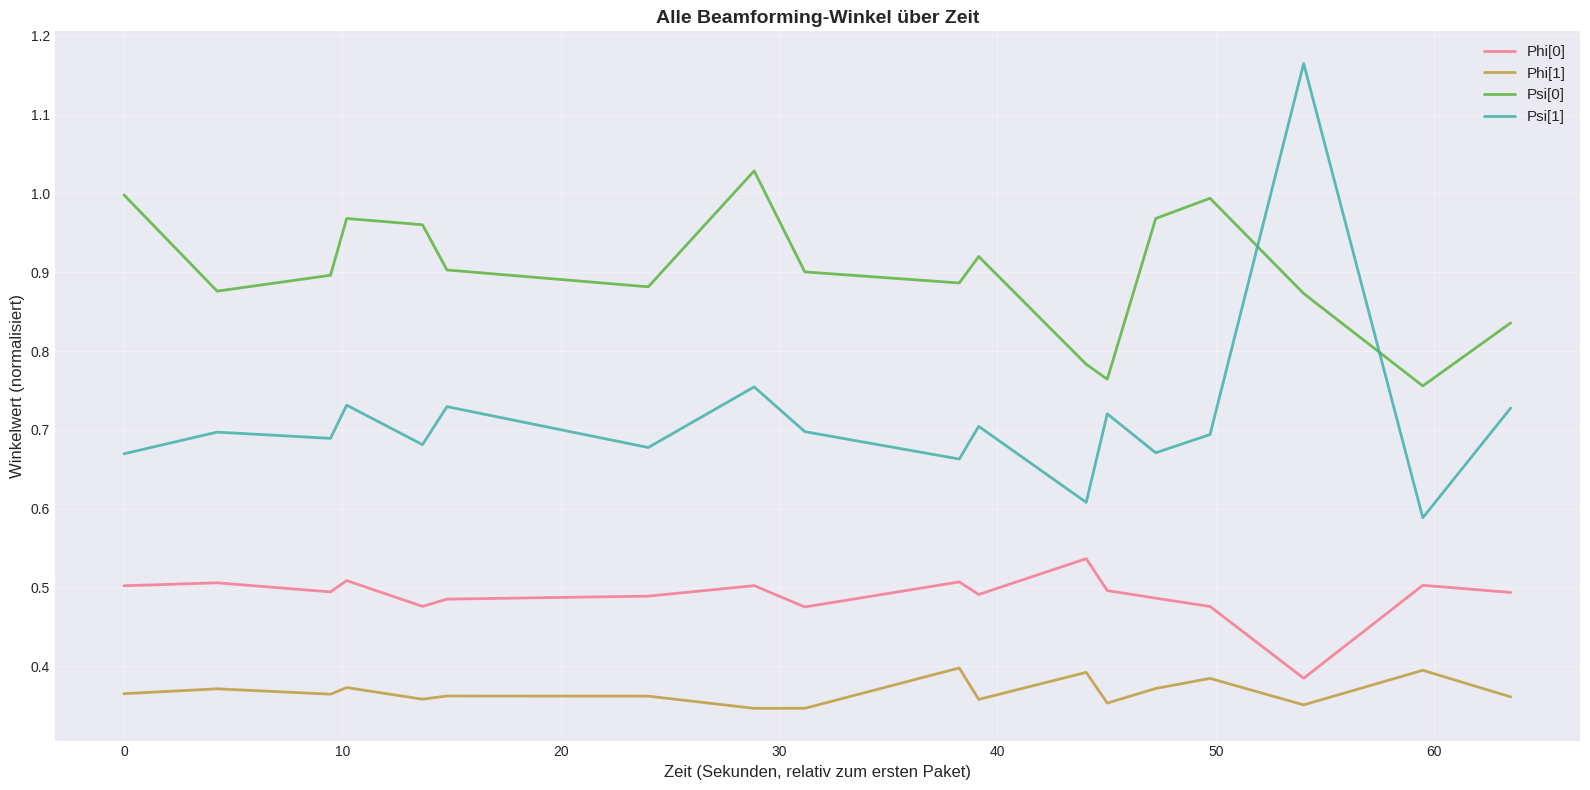

In [10]:
# Kombinierter Plot aller Winkel
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(frame_stats['timestamp_delta'], frame_stats['phi_0_mean'], 
        label='Phi[0]', linewidth=2, alpha=0.8)
ax.plot(frame_stats['timestamp_delta'], frame_stats['phi_1_mean'], 
        label='Phi[1]', linewidth=2, alpha=0.8)
ax.plot(frame_stats['timestamp_delta'], frame_stats['psi_0_mean'], 
        label='Psi[0]', linewidth=2, alpha=0.8)
ax.plot(frame_stats['timestamp_delta'], frame_stats['psi_1_mean'], 
        label='Psi[1]', linewidth=2, alpha=0.8)

ax.set_xlabel('Zeit (Sekunden, relativ zum ersten Paket)', fontsize=12)
ax.set_ylabel('Winkelwert (normalisiert)', fontsize=12)
ax.set_title('Alle Beamforming-Winkel über Zeit', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Subcarrier-Variation über Zeit

Analysiere Subcarrier: [np.int64(-122), np.int64(-74), np.int64(-27), np.int64(24), np.int64(71)]


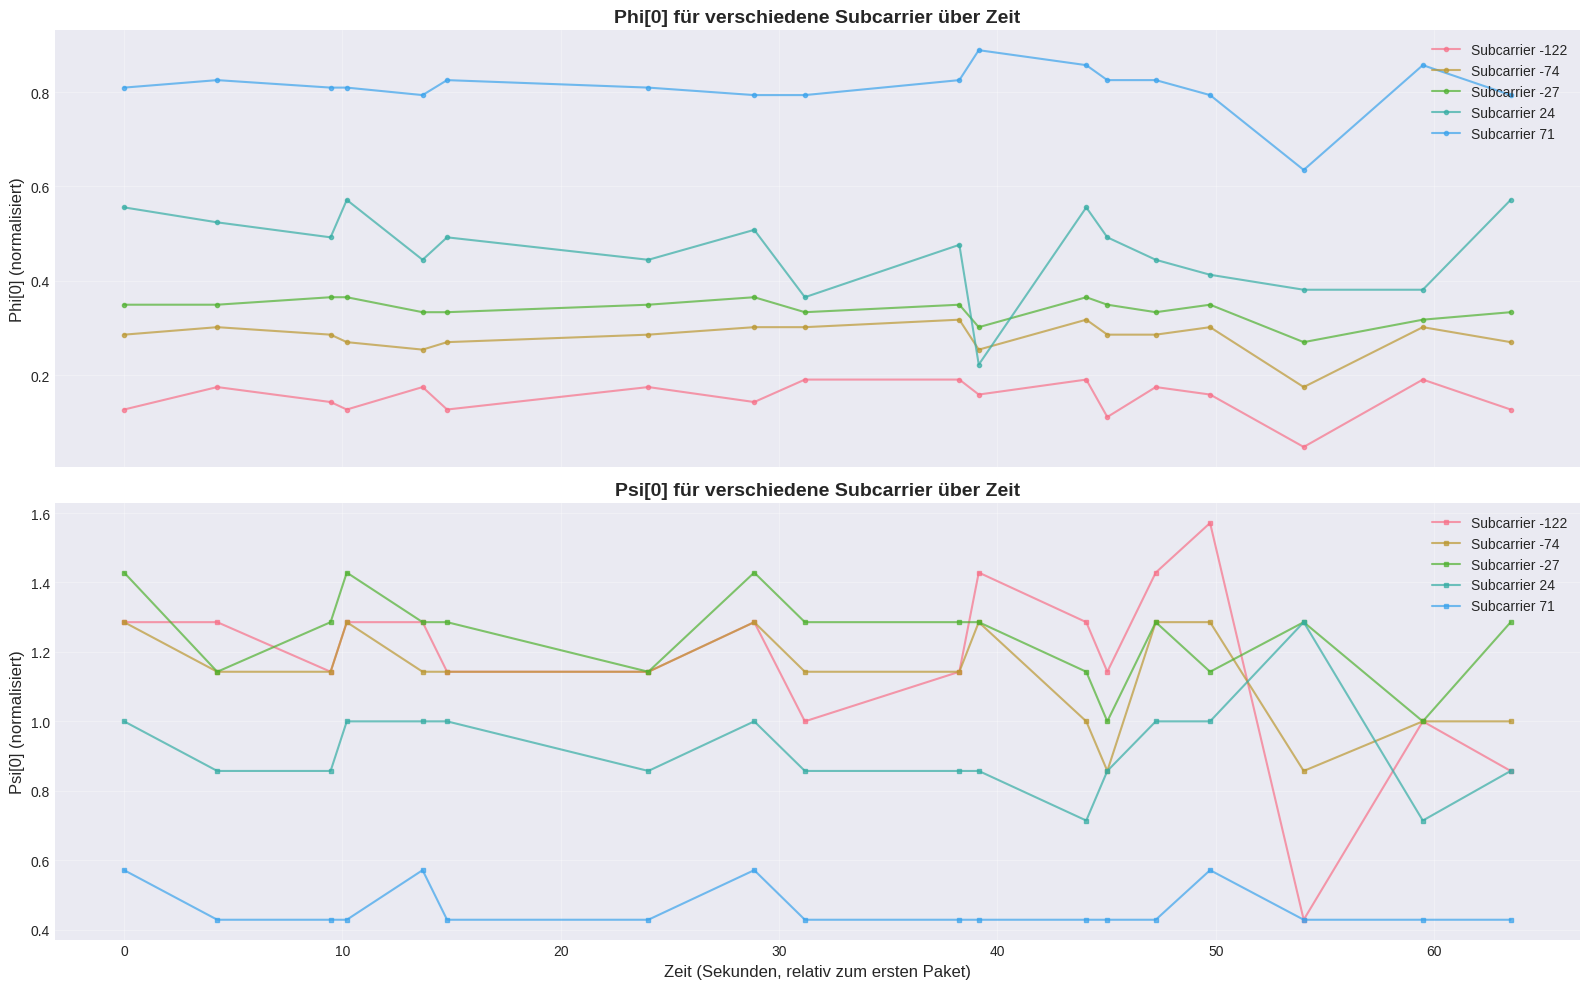

In [11]:
# Wähle einige repräsentative Subcarrier aus
representative_subcarriers = sorted(df['scidx'].unique())[::len(df['scidx'].unique())//5]  # 5 Subcarrier
if len(representative_subcarriers) > 5:
    representative_subcarriers = representative_subcarriers[:5]

print(f"Analysiere Subcarrier: {representative_subcarriers}")

# Erstelle Plot für Phi[0] für verschiedene Subcarrier
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Phi[0] für verschiedene Subcarrier
ax = axes[0]
for scidx in representative_subcarriers:
    sc_data = df[df['scidx'] == scidx].sort_values('timestamp_delta')
    ax.plot(sc_data['timestamp_delta'], sc_data['phi_0'], 
            label=f'Subcarrier {scidx}', linewidth=1.5, alpha=0.7, marker='o', markersize=3)
ax.set_ylabel('Phi[0] (normalisiert)', fontsize=12)
ax.set_title('Phi[0] für verschiedene Subcarrier über Zeit', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Psi[0] für verschiedene Subcarrier
ax = axes[1]
for scidx in representative_subcarriers:
    sc_data = df[df['scidx'] == scidx].sort_values('timestamp_delta')
    ax.plot(sc_data['timestamp_delta'], sc_data['psi_0'], 
            label=f'Subcarrier {scidx}', linewidth=1.5, alpha=0.7, marker='s', markersize=3)
ax.set_xlabel('Zeit (Sekunden, relativ zum ersten Paket)', fontsize=12)
ax.set_ylabel('Psi[0] (normalisiert)', fontsize=12)
ax.set_title('Psi[0] für verschiedene Subcarrier über Zeit', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Erweiterte Visualisierungen

### 4.1 2D Heatmaps: Zeit × Subcarrier

In [12]:
# Erstelle Pivot-Tabellen für Heatmaps
# Verwende timestamp_delta als Zeitachse und scidx als Subcarrier-Achse

# Für Phi[0]
pivot_phi0 = df.pivot_table(
    values='phi_0', 
    index='scidx', 
    columns='timestamp_delta', 
    aggfunc='mean'
)

# Für Phi[1]
pivot_phi1 = df.pivot_table(
    values='phi_1', 
    index='scidx', 
    columns='timestamp_delta', 
    aggfunc='mean'
)

# Für Psi[0]
pivot_psi0 = df.pivot_table(
    values='psi_0', 
    index='scidx', 
    columns='timestamp_delta', 
    aggfunc='mean'
)

# Für Psi[1]
pivot_psi1 = df.pivot_table(
    values='psi_1', 
    index='scidx', 
    columns='timestamp_delta', 
    aggfunc='mean'
)

print("Pivot-Tabellen für Heatmaps erstellt!")
print(f"Phi[0] Heatmap Shape: {pivot_phi0.shape}")
print(f"Subcarrier: {pivot_phi0.index.min()} bis {pivot_phi0.index.max()}")
print(f"Zeitpunkte: {pivot_phi0.columns.min():.3f}s bis {pivot_phi0.columns.max():.3f}s")

Pivot-Tabellen für Heatmaps erstellt!
Phi[0] Heatmap Shape: (234, 18)
Subcarrier: -122 bis 122
Zeitpunkte: 0.000s bis 63.507s


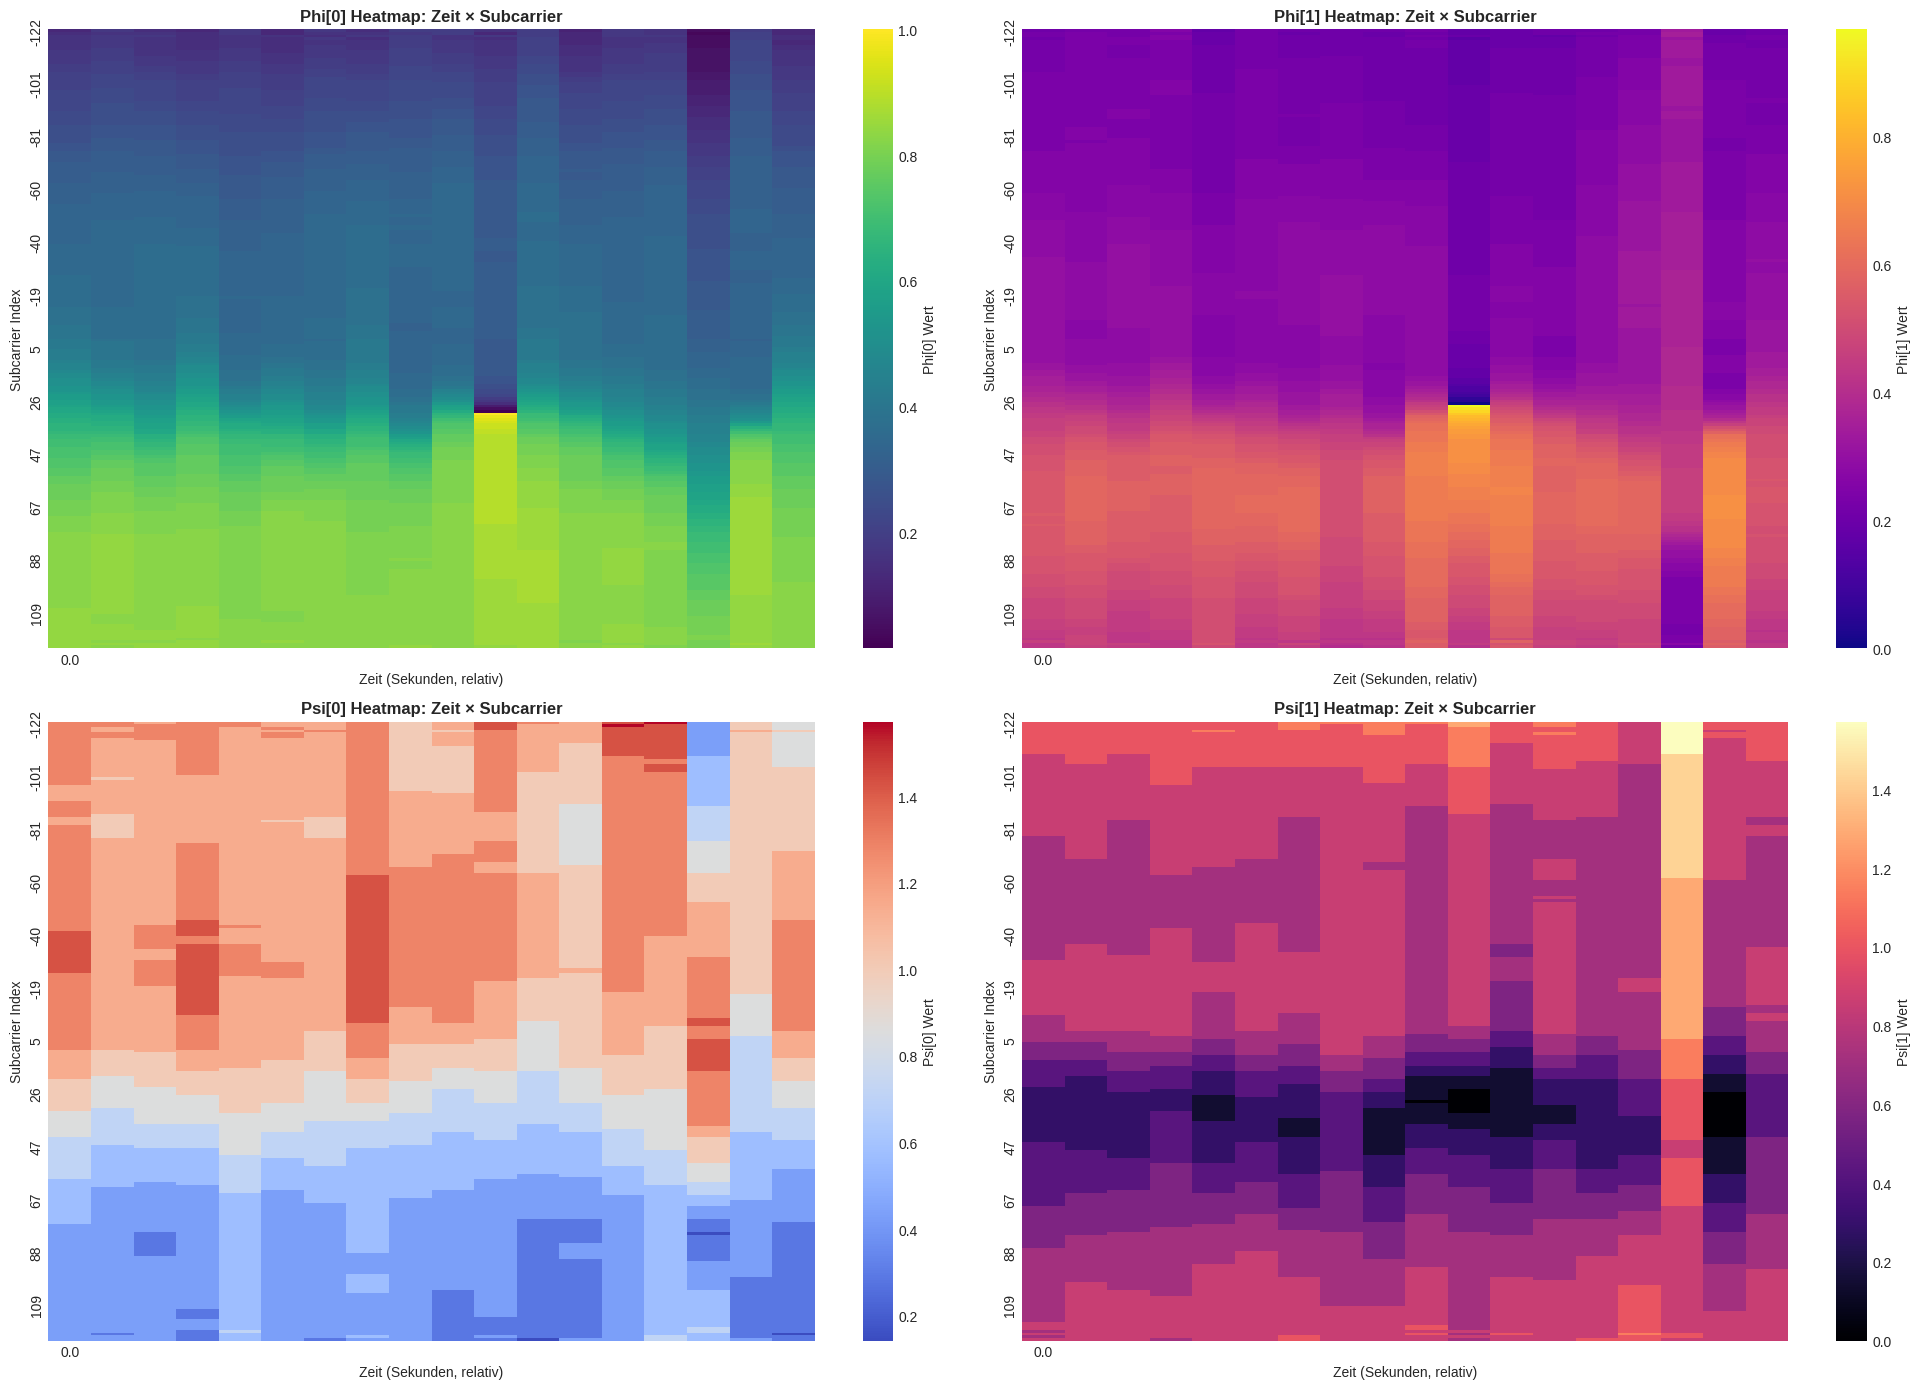

In [13]:
# Heatmap für Phi[0]
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Phi[0] Heatmap
ax = axes[0, 0]
sns.heatmap(pivot_phi0, ax=ax, cmap='viridis', cbar_kws={'label': 'Phi[0] Wert'}, 
            xticklabels=50, yticklabels=20)
ax.set_title('Phi[0] Heatmap: Zeit × Subcarrier', fontsize=12, fontweight='bold')
ax.set_xlabel('Zeit (Sekunden, relativ)', fontsize=10)
ax.set_ylabel('Subcarrier Index', fontsize=10)

# Phi[1] Heatmap
ax = axes[0, 1]
sns.heatmap(pivot_phi1, ax=ax, cmap='plasma', cbar_kws={'label': 'Phi[1] Wert'}, 
            xticklabels=50, yticklabels=20)
ax.set_title('Phi[1] Heatmap: Zeit × Subcarrier', fontsize=12, fontweight='bold')
ax.set_xlabel('Zeit (Sekunden, relativ)', fontsize=10)
ax.set_ylabel('Subcarrier Index', fontsize=10)

# Psi[0] Heatmap
ax = axes[1, 0]
sns.heatmap(pivot_psi0, ax=ax, cmap='coolwarm', cbar_kws={'label': 'Psi[0] Wert'}, 
            xticklabels=50, yticklabels=20)
ax.set_title('Psi[0] Heatmap: Zeit × Subcarrier', fontsize=12, fontweight='bold')
ax.set_xlabel('Zeit (Sekunden, relativ)', fontsize=10)
ax.set_ylabel('Subcarrier Index', fontsize=10)

# Psi[1] Heatmap
ax = axes[1, 1]
sns.heatmap(pivot_psi1, ax=ax, cmap='magma', cbar_kws={'label': 'Psi[1] Wert'}, 
            xticklabels=50, yticklabels=20)
ax.set_title('Psi[1] Heatmap: Zeit × Subcarrier', fontsize=12, fontweight='bold')
ax.set_xlabel('Zeit (Sekunden, relativ)', fontsize=10)
ax.set_ylabel('Subcarrier Index', fontsize=10)

plt.tight_layout()
plt.show()

### 4.2 Statistische Analysen

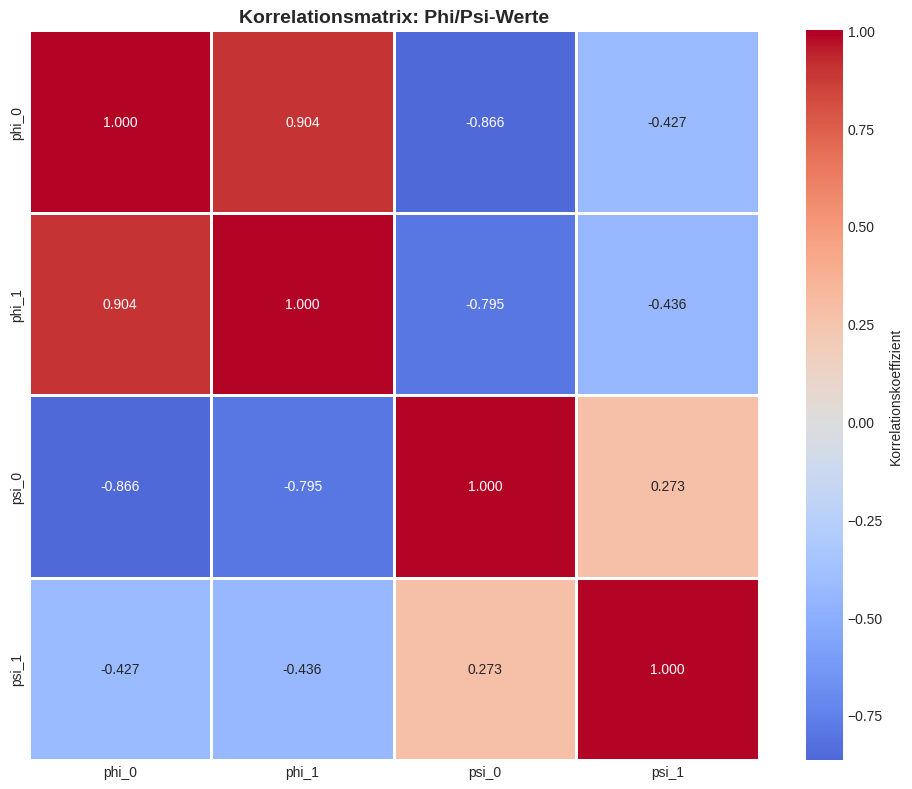


Korrelationskoeffizienten:
          phi_0     phi_1     psi_0     psi_1
phi_0  1.000000  0.904406 -0.865560 -0.426946
phi_1  0.904406  1.000000 -0.795314 -0.436180
psi_0 -0.865560 -0.795314  1.000000  0.273146
psi_1 -0.426946 -0.436180  0.273146  1.000000


In [14]:
# Korrelationsmatrix zwischen Phi/Psi-Werten
correlation_data = df[['phi_0', 'phi_1', 'psi_0', 'psi_1']].dropna()
corr_matrix = correlation_data.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={'label': 'Korrelationskoeffizient'}, ax=ax)
ax.set_title('Korrelationsmatrix: Phi/Psi-Werte', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKorrelationskoeffizienten:")
print(corr_matrix)

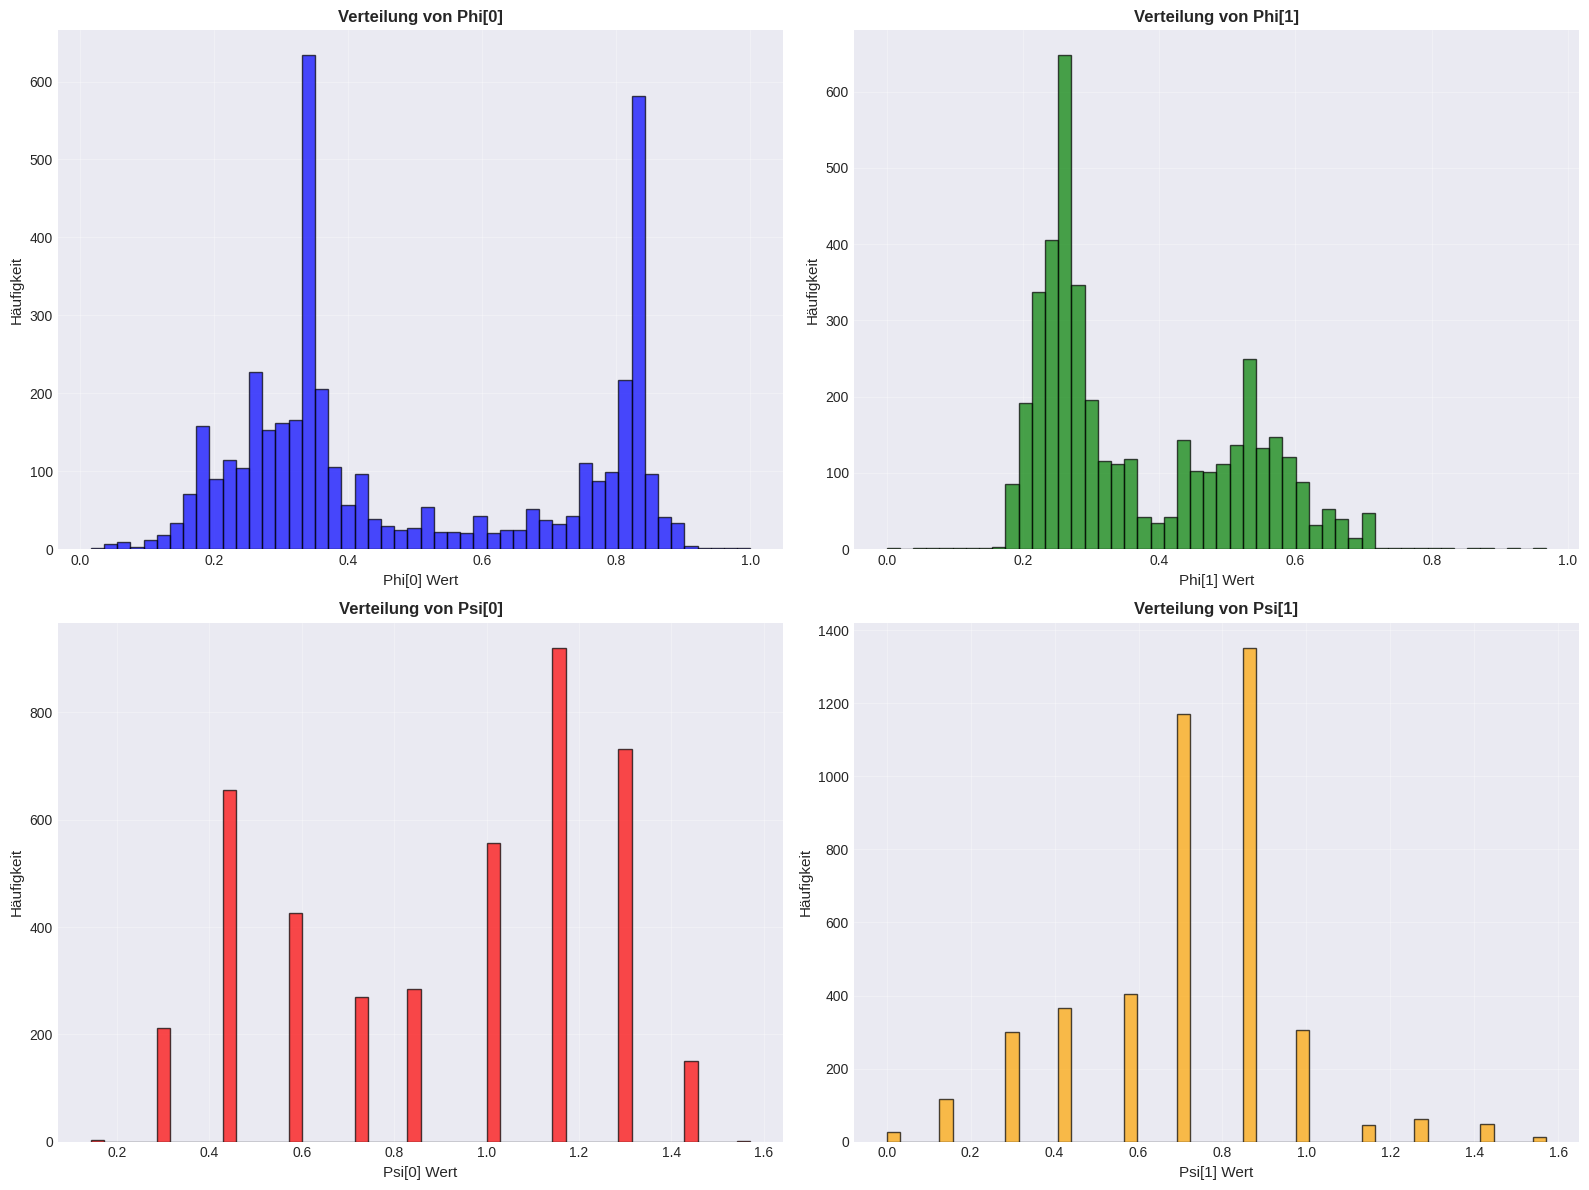

In [15]:
# Verteilungen der Winkelwerte
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Phi[0] Verteilung
ax = axes[0, 0]
ax.hist(df['phi_0'].dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
ax.set_xlabel('Phi[0] Wert', fontsize=11)
ax.set_ylabel('Häufigkeit', fontsize=11)
ax.set_title('Verteilung von Phi[0]', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Phi[1] Verteilung
ax = axes[0, 1]
ax.hist(df['phi_1'].dropna(), bins=50, alpha=0.7, color='green', edgecolor='black')
ax.set_xlabel('Phi[1] Wert', fontsize=11)
ax.set_ylabel('Häufigkeit', fontsize=11)
ax.set_title('Verteilung von Phi[1]', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Psi[0] Verteilung
ax = axes[1, 0]
ax.hist(df['psi_0'].dropna(), bins=50, alpha=0.7, color='red', edgecolor='black')
ax.set_xlabel('Psi[0] Wert', fontsize=11)
ax.set_ylabel('Häufigkeit', fontsize=11)
ax.set_title('Verteilung von Psi[0]', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Psi[1] Verteilung
ax = axes[1, 1]
ax.hist(df['psi_1'].dropna(), bins=50, alpha=0.7, color='orange', edgecolor='black')
ax.set_xlabel('Psi[1] Wert', fontsize=11)
ax.set_ylabel('Häufigkeit', fontsize=11)
ax.set_title('Verteilung von Psi[1]', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

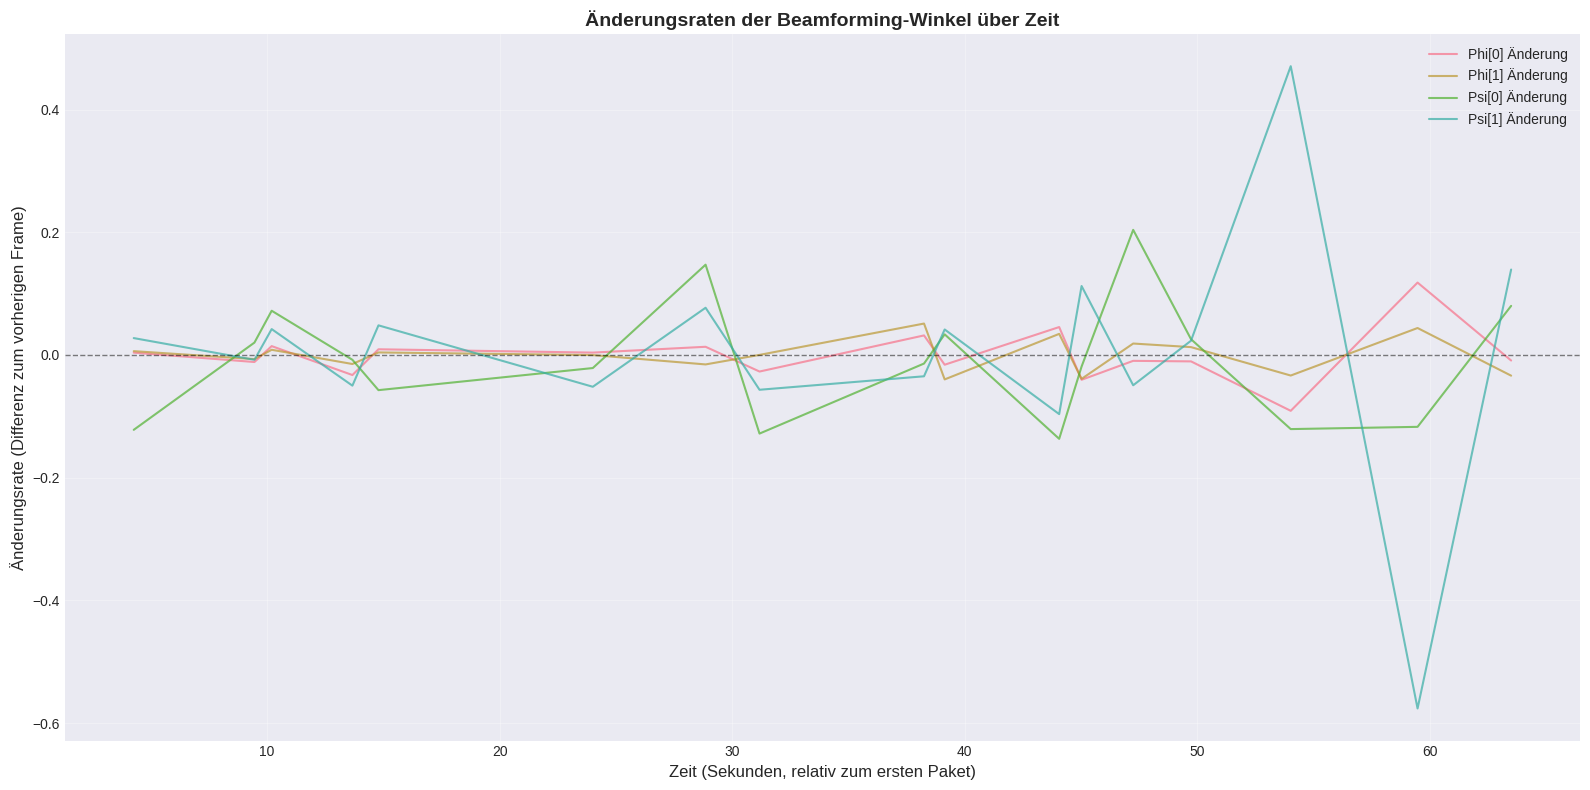

In [16]:
# Berechne Änderungsraten (Differenzen zwischen aufeinanderfolgenden Frames)
frame_stats_sorted = frame_stats.sort_values('timestamp_delta')

# Berechne Differenzen
frame_stats_sorted['phi_0_diff'] = frame_stats_sorted['phi_0_mean'].diff()
frame_stats_sorted['phi_1_diff'] = frame_stats_sorted['phi_1_mean'].diff()
frame_stats_sorted['psi_0_diff'] = frame_stats_sorted['psi_0_mean'].diff()
frame_stats_sorted['psi_1_diff'] = frame_stats_sorted['psi_1_mean'].diff()

# Plot der Änderungsraten
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(frame_stats_sorted['timestamp_delta'], frame_stats_sorted['phi_0_diff'], 
        label='Phi[0] Änderung', linewidth=1.5, alpha=0.7)
ax.plot(frame_stats_sorted['timestamp_delta'], frame_stats_sorted['phi_1_diff'], 
        label='Phi[1] Änderung', linewidth=1.5, alpha=0.7)
ax.plot(frame_stats_sorted['timestamp_delta'], frame_stats_sorted['psi_0_diff'], 
        label='Psi[0] Änderung', linewidth=1.5, alpha=0.7)
ax.plot(frame_stats_sorted['timestamp_delta'], frame_stats_sorted['psi_1_diff'], 
        label='Psi[1] Änderung', linewidth=1.5, alpha=0.7)

ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('Zeit (Sekunden, relativ zum ersten Paket)', fontsize=12)
ax.set_ylabel('Änderungsrate (Differenz zum vorherigen Frame)', fontsize=12)
ax.set_title('Änderungsraten der Beamforming-Winkel über Zeit', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Zusammenfassung und Export

In [17]:
# Zusammenfassende Statistiken
print("=== Zusammenfassende Statistiken ===")
print("\nPhi-Werte:")
print(f"  Phi[0]: Mittelwert={df['phi_0'].mean():.4f}, Std={df['phi_0'].std():.4f}, "
      f"Min={df['phi_0'].min():.4f}, Max={df['phi_0'].max():.4f}")
print(f"  Phi[1]: Mittelwert={df['phi_1'].mean():.4f}, Std={df['phi_1'].std():.4f}, "
      f"Min={df['phi_1'].min():.4f}, Max={df['phi_1'].max():.4f}")

print("\nPsi-Werte:")
print(f"  Psi[0]: Mittelwert={df['psi_0'].mean():.4f}, Std={df['psi_0'].std():.4f}, "
      f"Min={df['psi_0'].min():.4f}, Max={df['psi_0'].max():.4f}")
print(f"  Psi[1]: Mittelwert={df['psi_1'].mean():.4f}, Std={df['psi_1'].std():.4f}, "
      f"Min={df['psi_1'].min():.4f}, Max={df['psi_1'].max():.4f}")

print(f"\nZeitliche Variation:")
print(f"  Anzahl Frames: {len(frame_stats)}")
print(f"  Durchschnittliche Subcarrier pro Frame: {frame_stats['subcarrier_count'].mean():.1f}")
print(f"  Zeitliche Spanne: {frame_stats['timestamp_delta'].max() - frame_stats['timestamp_delta'].min():.3f} Sekunden")

=== Zusammenfassende Statistiken ===

Phi-Werte:
  Phi[0]: Mittelwert=0.4897, Std=0.2457, Min=0.0159, Max=1.0000
  Phi[1]: Mittelwert=0.3676, Std=0.1449, Min=0.0000, Max=0.9683

Psi-Werte:
  Psi[0]: Mittelwert=0.8996, Std=0.3428, Min=0.1429, Max=1.5714
  Psi[1]: Mittelwert=0.7150, Std=0.2481, Min=0.0000, Max=1.5714

Zeitliche Variation:
  Anzahl Frames: 18
  Durchschnittliche Subcarrier pro Frame: 234.0
  Zeitliche Spanne: 63.507 Sekunden


In [18]:
# Optional: Export aggregierter Daten
# frame_stats.to_csv('beamforming_frame_stats.csv', index=False)
# print("Aggregierte Daten exportiert!")

# Optional: Speichere Visualisierungen
# plt.savefig('beamforming_analysis.png', dpi=300, bbox_inches='tight')
# print("Visualisierungen gespeichert!")

## 6. Räumliche 2D-Visualisierung und Animation

In diesem Abschnitt werden die Subcarrier-Werte räumlich in 2D dargestellt, um Bewegungen im Raum zu erkennen. Jeder Subcarrier wird als Punkt dargestellt, und die Animation zeigt die zeitliche Entwicklung.

### 6.1 Statische 2D-Scatter-Plots (Test)

Zuerst erstellen wir statische Scatter-Plots für verschiedene Zeitpunkte, um die räumliche Verteilung zu verstehen.

Zeige 6 repräsentative Frames: [np.int64(1), np.int64(4), np.int64(7), np.int64(10), np.int64(13), np.int64(16)]


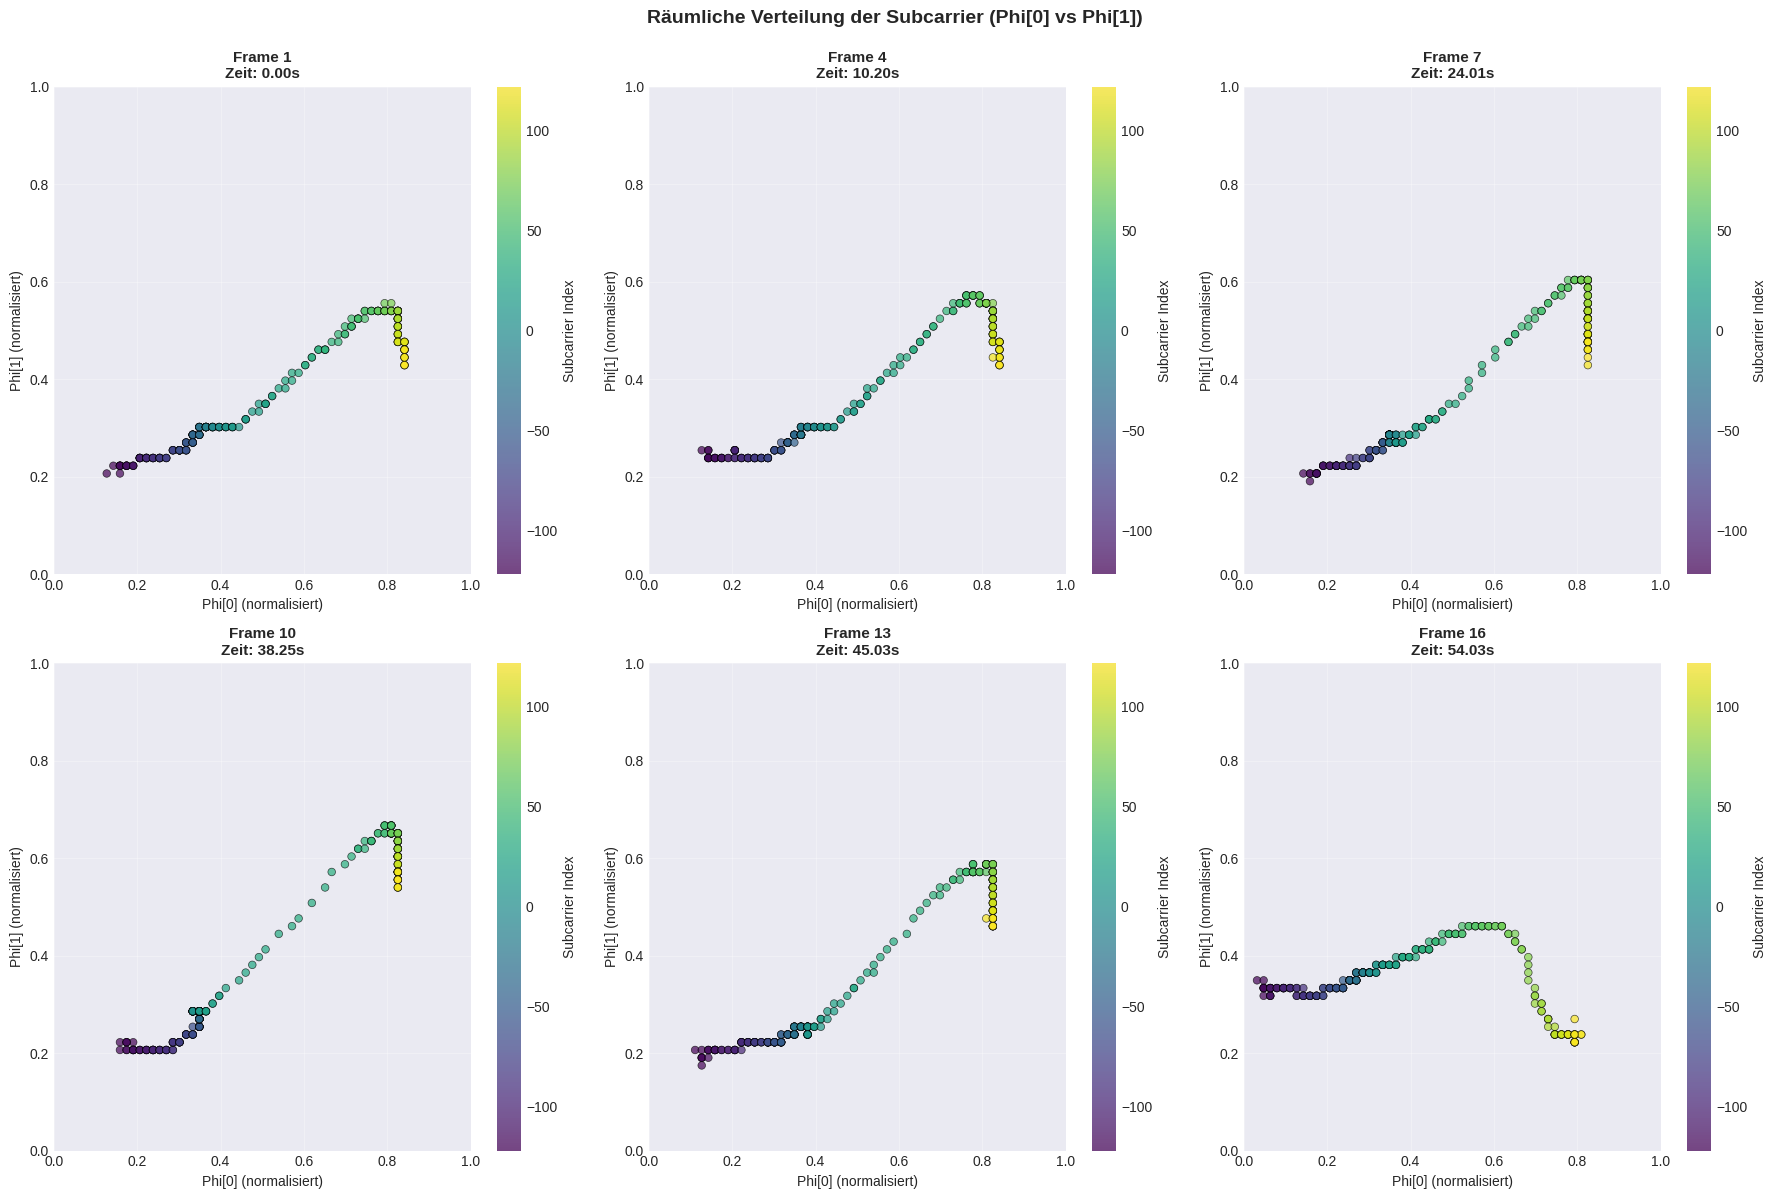

In [19]:
# Wähle einige repräsentative Frames für statische Visualisierung
unique_frames = sorted(df['frame_number'].unique())
num_test_frames = min(6, len(unique_frames))
test_frames = unique_frames[::max(1, len(unique_frames)//num_test_frames)][:num_test_frames]

print(f"Zeige {len(test_frames)} repräsentative Frames: {test_frames}")

# Erstelle statische Scatter-Plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, frame_num in enumerate(test_frames):
    if idx >= len(axes):
        break
    
    frame_data = df[df['frame_number'] == frame_num].dropna(subset=['phi_0', 'phi_1'])
    
    ax = axes[idx]
    scatter = ax.scatter(frame_data['phi_0'], frame_data['phi_1'], 
                         c=frame_data['scidx'], cmap='viridis', 
                         s=30, alpha=0.7, edgecolors='black', linewidth=0.5)
    ax.set_xlabel('Phi[0] (normalisiert)', fontsize=10)
    ax.set_ylabel('Phi[1] (normalisiert)', fontsize=10)
    ax.set_title(f'Frame {frame_num}\nZeit: {frame_data["timestamp_delta"].iloc[0]:.2f}s', 
                 fontsize=11, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='Subcarrier Index')

# Entferne leere Subplots
for idx in range(len(test_frames), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Räumliche Verteilung der Subcarrier (Phi[0] vs Phi[1])', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

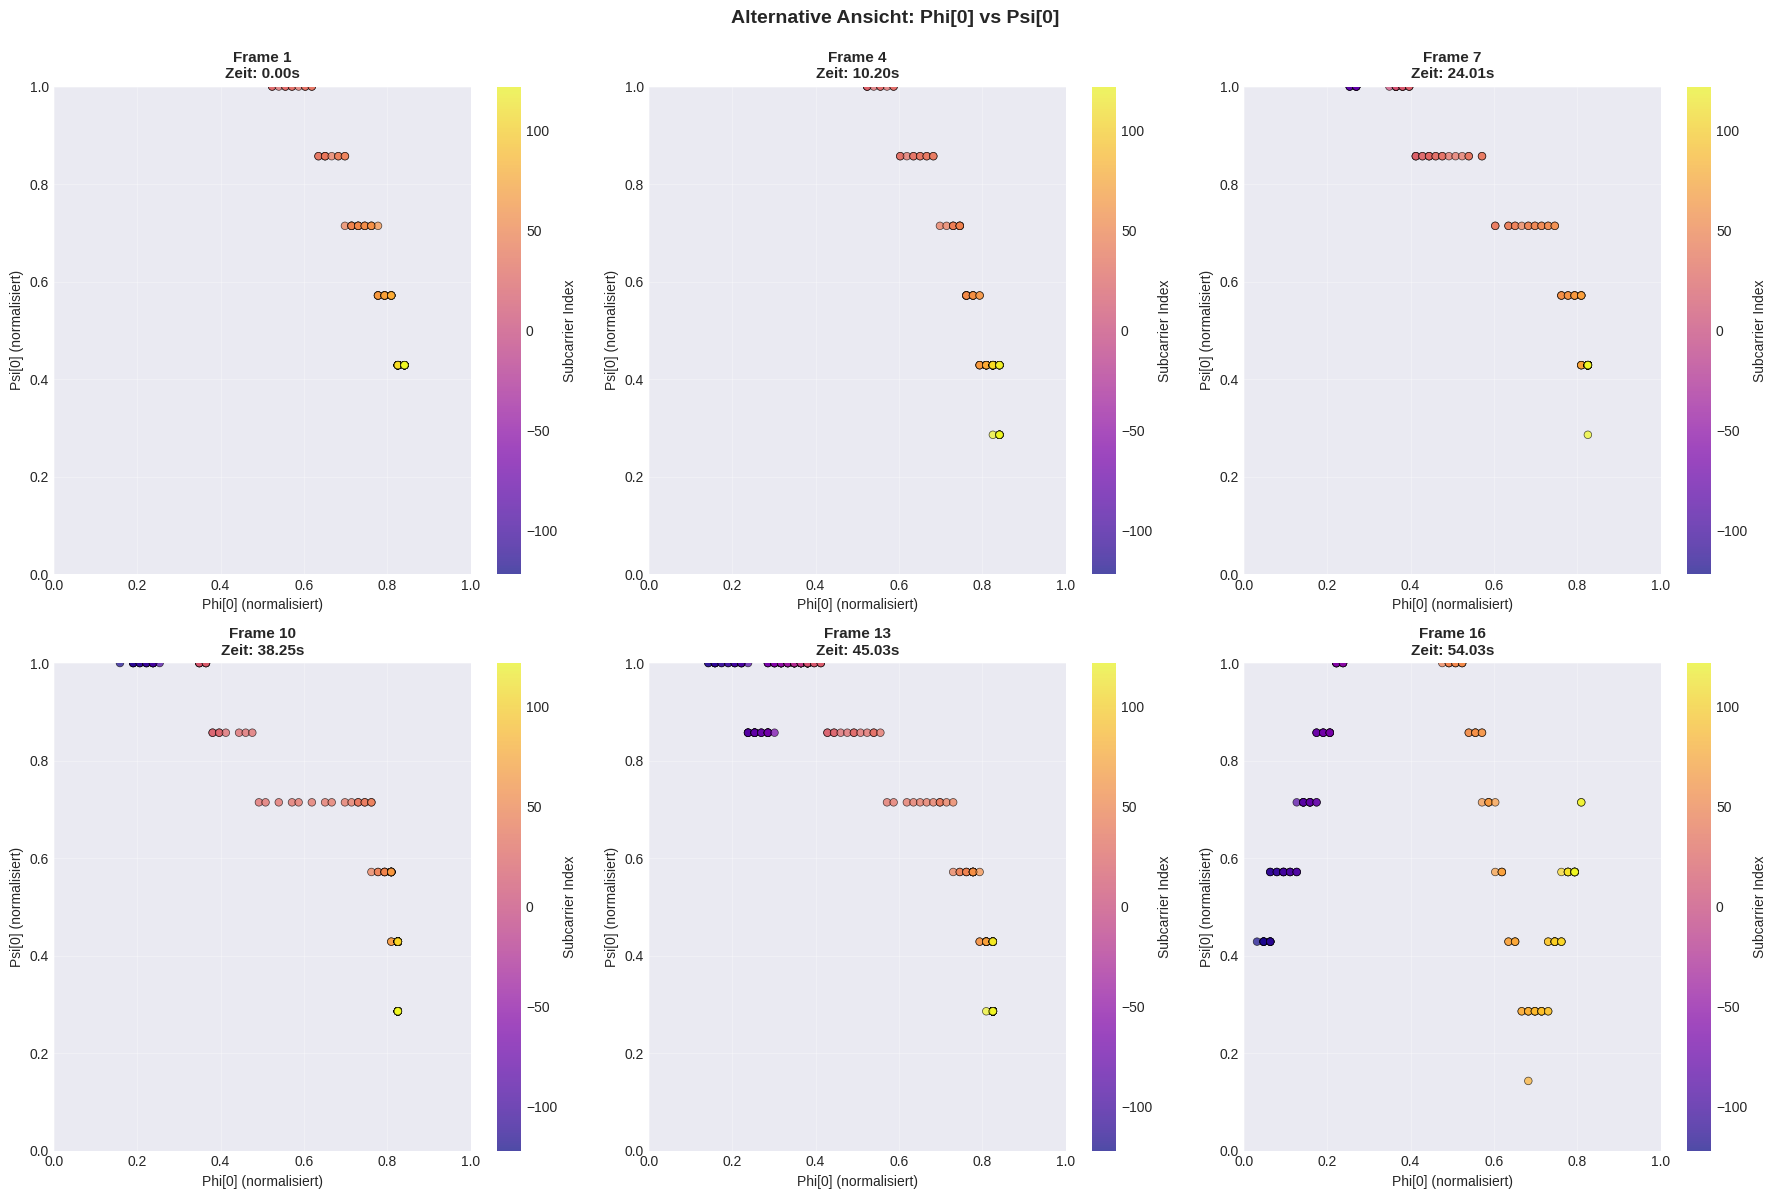

In [20]:
# Alternative Ansicht: Phi[0] vs Psi[0]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, frame_num in enumerate(test_frames):
    if idx >= len(axes):
        break
    
    frame_data = df[df['frame_number'] == frame_num].dropna(subset=['phi_0', 'psi_0'])
    
    ax = axes[idx]
    scatter = ax.scatter(frame_data['phi_0'], frame_data['psi_0'], 
                         c=frame_data['scidx'], cmap='plasma', 
                         s=30, alpha=0.7, edgecolors='black', linewidth=0.5)
    ax.set_xlabel('Phi[0] (normalisiert)', fontsize=10)
    ax.set_ylabel('Psi[0] (normalisiert)', fontsize=10)
    ax.set_title(f'Frame {frame_num}\nZeit: {frame_data["timestamp_delta"].iloc[0]:.2f}s', 
                 fontsize=11, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='Subcarrier Index')

# Entferne leere Subplots
for idx in range(len(test_frames), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Alternative Ansicht: Phi[0] vs Psi[0]', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### 6.2 Animation vorbereiten

Jetzt bereiten wir die Daten für die Animation vor. Jeder Frame entspricht einer Sekunde im Video.

In [21]:
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
import subprocess
import sys

# Prüfe ob ffmpeg verfügbar ist
def check_ffmpeg():
    """Prüft ob ffmpeg installiert ist."""
    try:
        subprocess.run(['ffmpeg', '-version'], capture_output=True, check=True)
        return True
    except (subprocess.CalledProcessError, FileNotFoundError):
        return False

ffmpeg_available = check_ffmpeg()
if not ffmpeg_available:
    print("WARNUNG: ffmpeg ist nicht installiert. Video-Export wird nicht funktionieren.")
    print("Installation: sudo apt-get install ffmpeg (Ubuntu/Debian) oder ähnlich")
else:
    print("✓ ffmpeg ist verfügbar")

# Gruppiere Daten nach Frame für effizienten Zugriff
print("\nBereite Daten für Animation vor...")
frames_data = df.groupby('frame_number')
unique_frames = sorted(df['frame_number'].unique())
print(f"Anzahl Frames: {len(unique_frames)}")
print(f"Video-Dauer: {len(unique_frames)} Sekunden ({len(unique_frames)/60:.1f} Minuten)")

# Bestimme gemeinsame Achsen-Limits für konsistente Animation
phi_0_min, phi_0_max = df['phi_0'].min(), df['phi_0'].max()
phi_1_min, phi_1_max = df['phi_1'].min(), df['phi_1'].max()
psi_0_min, psi_0_max = df['psi_0'].min(), df['psi_0'].max()
psi_1_min, psi_1_max = df['psi_1'].min(), df['psi_1'].max()

print(f"\nAchsen-Limits:")
print(f"  Phi[0]: [{phi_0_min:.3f}, {phi_0_max:.3f}]")
print(f"  Phi[1]: [{phi_1_min:.3f}, {phi_1_max:.3f}]")

✓ ffmpeg ist verfügbar

Bereite Daten für Animation vor...
Anzahl Frames: 18
Video-Dauer: 18 Sekunden (0.3 Minuten)

Achsen-Limits:
  Phi[0]: [0.016, 1.000]
  Phi[1]: [0.000, 0.968]


In [22]:
# Berechne Zeitdifferenzen zwischen Frames# Jeder Frame wird so lange angezeigt, wie die Zeit bis zum nächsten Paketframe_timestamps = df.groupby('frame_number')['timestamp_delta'].first().sort_index()frame_durations = []  # Dauer jedes Frames in Sekundenfor idx in range(len(unique_frames)):    current_frame = unique_frames[idx]    current_time = frame_timestamps[current_frame]    if idx < len(unique_frames) - 1:        next_frame = unique_frames[idx + 1]        next_time = frame_timestamps[next_frame]        duration = next_time - current_time    else:        # Letzter Frame: verwende Durchschnitt der vorherigen Dauer        if len(frame_durations) > 0:            duration = np.mean(frame_durations)        else:            duration = 1.0  # Fallback    frame_durations.append(max(0.1, duration))  # Mindestens 0.1 Sekundenframe_durations = np.array(frame_durations)print(f"\nZeitdifferenzen berechnet:")print(f"  Durchschnitt: {np.mean(frame_durations):.3f}s")print(f"  Minimum: {np.min(frame_durations):.3f}s")print(f"  Maximum: {np.max(frame_durations):.3f}s")print(f"  Gesamtdauer: {np.sum(frame_durations):.2f}s")

In [23]:
# Funktion zum Zeichnen eines Animations-Frames
def create_animation_frame_func(ax, frames_data, view_type='phi_phi'):
    """
    Erstellt eine Funktion zum Zeichnen eines Animations-Frames.
    
    Args:
        ax: Matplotlib Axes-Objekt
        frames_data: Gruppierte Daten nach frame_number
        view_type: 'phi_phi' (Phi[0] vs Phi[1]) oder 'phi_psi' (Phi[0] vs Psi[0])
    """
    def animate(frame_num):
        ax.clear()
        
        try:
            frame_data = frames_data.get_group(frame_num)
        except KeyError:
            # Frame nicht gefunden, zeige leeren Plot
            ax.text(0.5, 0.5, f'Frame {frame_num}\nKeine Daten', 
                   ha='center', va='center', transform=ax.transAxes)
            return
        
        # Wähle Daten basierend auf view_type
        if view_type == 'phi_phi':
            x_label = 'Phi[0] (normalisiert)'
            y_label = 'Phi[1] (normalisiert)'
            # Nur Zeilen mit beiden Werten
            valid_mask = frame_data['phi_0'].notna() & frame_data['phi_1'].notna()
            frame_data_valid = frame_data[valid_mask]
            x_col = 'phi_0'
            y_col = 'phi_1'
        elif view_type == 'phi_psi':
            x_label = 'Phi[0] (normalisiert)'
            y_label = 'Psi[0] (normalisiert)'
            valid_mask = frame_data['phi_0'].notna() & frame_data['psi_0'].notna()
            frame_data_valid = frame_data[valid_mask]
            x_col = 'phi_0'
            y_col = 'psi_0'
        else:
            raise ValueError(f"Unbekannter view_type: {view_type}")
        
        if len(frame_data_valid) == 0:
            ax.text(0.5, 0.5, f'Frame {frame_num}\nKeine gültigen Daten', 
                   ha='center', va='center', transform=ax.transAxes)
            return
        
        # Scatter-Plot mit Farbcodierung nach Subcarrier-Index
        scatter = ax.scatter(frame_data_valid[x_col], 
                            frame_data_valid[y_col],
                            c=frame_data_valid['scidx'], 
                            cmap='viridis' if view_type == 'phi_phi' else 'plasma',
                            s=50, alpha=0.7, edgecolors='black', linewidth=0.3)
        
        # Labels und Titel
        ax.set_xlabel(x_label, fontsize=12)
        ax.set_ylabel(y_label, fontsize=12)
        timestamp = frame_data['timestamp_delta'].iloc[0]
        ax.set_title(f'Frame {frame_num} | Zeit: {timestamp:.2f}s | Subcarrier: {len(frame_data_valid)}', 
                    fontsize=13, fontweight='bold')
        
        # Setze Achsen-Limits
        if view_type == 'phi_phi':
            ax.set_xlim(phi_0_min - 0.05, phi_0_max + 0.05)
            ax.set_ylim(phi_1_min - 0.05, phi_1_max + 0.05)
        else:
            ax.set_xlim(phi_0_min - 0.05, phi_0_max + 0.05)
            ax.set_ylim(psi_0_min - 0.05, psi_0_max + 0.05)
        
        ax.grid(True, alpha=0.3)
        ax.set_aspect('auto')
        
        # Colorbar entfernt - nur Punkte werden angezeigt
    
    return animate

print("Animation-Funktion erstellt!")

Animation-Funktion erstellt!


### 6.3 Animation erstellen

Erstelle die Animation mit matplotlib.animation.FuncAnimation. Jeder Frame wird 1 Sekunde lang angezeigt (1 FPS).

Animation erstellt: 18 Frames, 1 Sekunde pro Frame
Animation wird im Notebook angezeigt. Für Video-Export siehe nächste Zelle.

Hinweis: Die Animation kann im Notebook langsam sein. Für bessere Performance exportiere als Video.


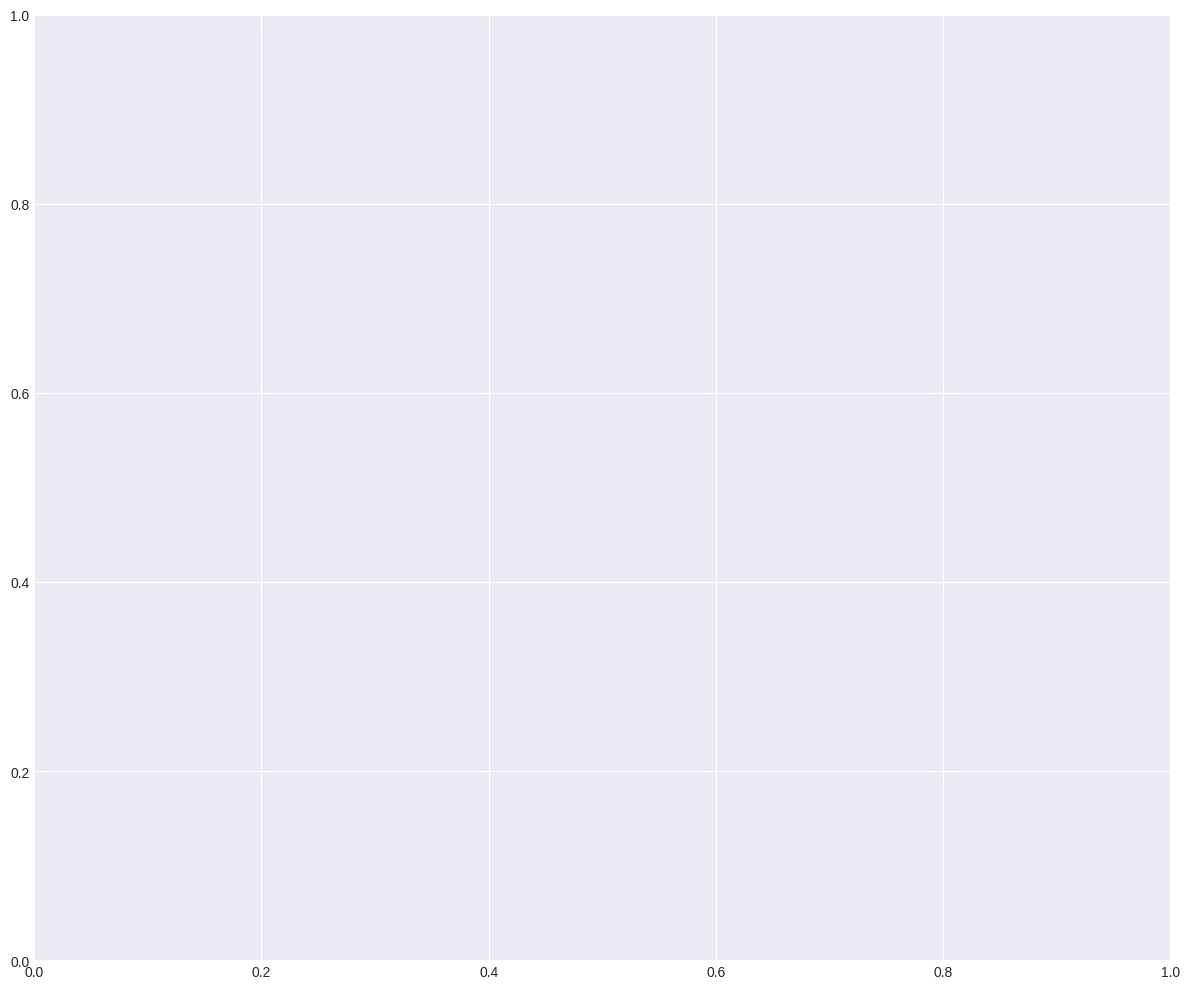

In [24]:
# Erstelle Animation: Phi[0] vs Phi[1]
fig, ax = plt.subplots(figsize=(12, 10))

# Erstelle Animations-Funktion
animate_func = create_animation_frame_func(ax, frames_data, view_type='phi_phi')

# Erstelle Animation
# interval=1000 bedeutet 1000ms = 1 Sekunde pro Frame
# Das entspricht 1 FPS, was unserer Anforderung entspricht (1 Nachricht = 1 Sekunde)
anim = animation.FuncAnimation(
    fig, 
    animate_func, 
    frames=unique_frames,
    interval=1000,  # 1 Sekunde pro Frame
    repeat=True,
    blit=False  # blit=False für bessere Kompatibilität
)

print(f"Animation erstellt: {len(unique_frames)} Frames, 1 Sekunde pro Frame")
print("Animation wird im Notebook angezeigt. Für Video-Export siehe nächste Zelle.")
print("\nHinweis: Die Animation kann im Notebook langsam sein. Für bessere Performance exportiere als Video.")

# Zeige Animation im Notebook
plt.tight_layout()
plt.show()

### 6.4 Video exportieren

Exportiere die Animation als MP4-Video. Jeder Frame entspricht 1 Sekunde im Video.

Starte Video-Export...
Anzahl Frames: 18
Geschätzte Dauer: 18 Sekunden
Dies kann einige Minuten dauern...
Berechne Zeitdifferenzen...
Zeitdifferenzen berechnet: 18 Frames
Erweiterte Frame-Liste: 673 Frames (aus 18 Original-Frames)
Video-Dauer: 67.24 Sekunden

Exportiere nach: ekin_kammi_esko_in_chair_andi_comes_in_goes_to_sauna_and_back_to_the_room_animation_phi_phi.mp4
✓ Video erfolgreich exportiert: ekin_kammi_esko_in_chair_andi_comes_in_goes_to_sauna_and_back_to_the_room_animation_phi_phi.mp4
  Dateigröße: 0.51 MB


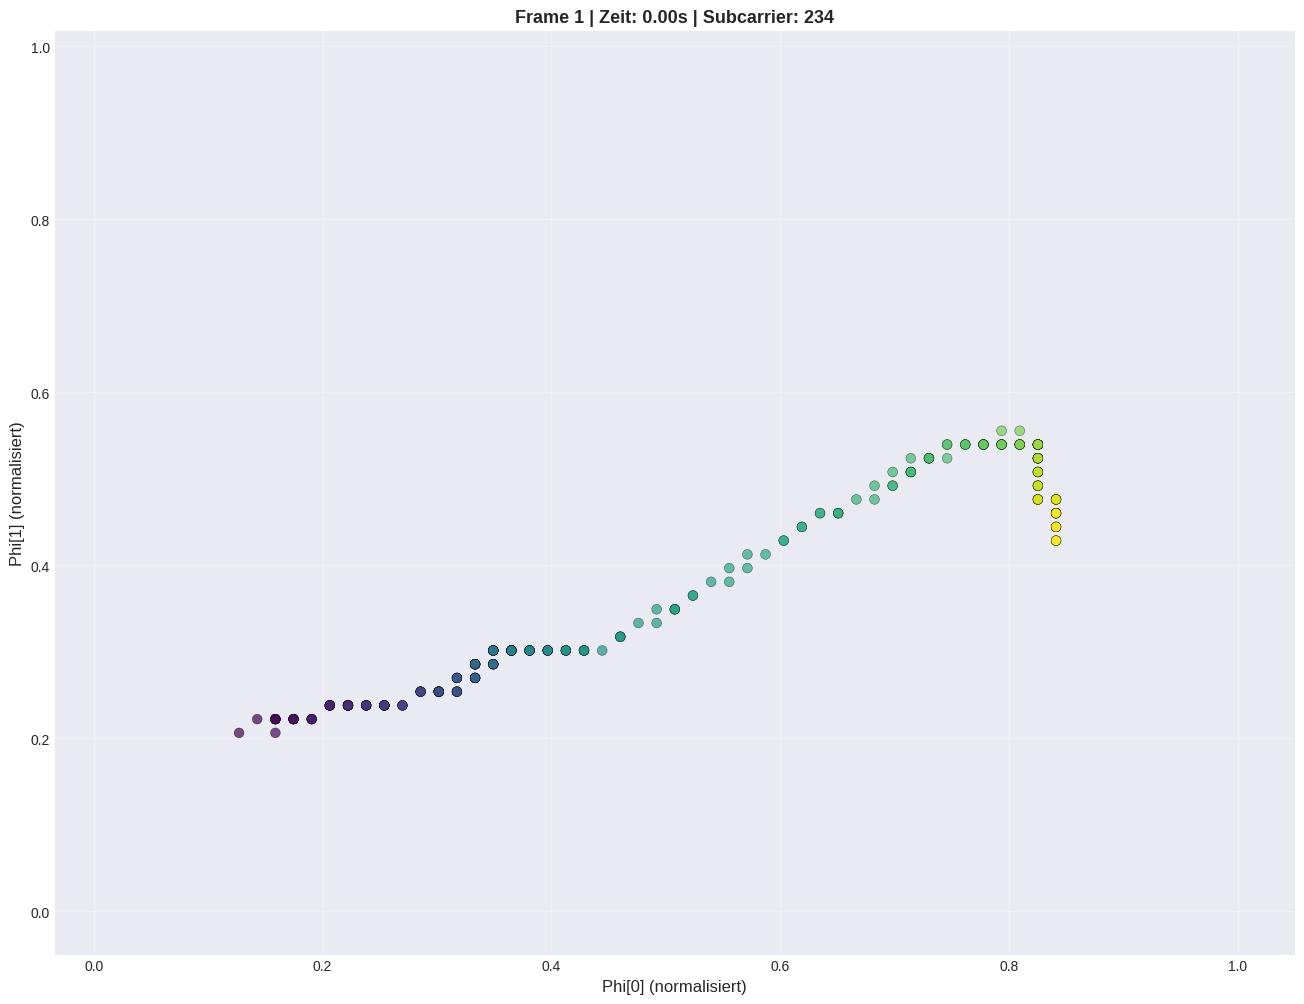

In [25]:
# Video-Export: Phi[0] vs Phi[1]
if ffmpeg_available:
    print("Starte Video-Export...")
    print(f"Anzahl Frames: {len(unique_frames)}")
    print(f"Geschätzte Dauer: {len(unique_frames)} Sekunden")
    print("Dies kann einige Minuten dauern...")
    
    # Erstelle neue Figur für Video (kann andere Größe haben)
    fig_video, ax_video = plt.subplots(figsize=(16, 12))
    animate_func_video = create_animation_frame_func(ax_video, frames_data, view_type='phi_phi')
    
    # Erstelle erweiterte Frame-Liste basierend auf Zeitdifferenzen
    # Jeder Frame wird entsprechend seiner Dauer wiederholt
    base_fps = 10  # Basis-FPS für Video (höher = flüssiger)
    extended_frames = []
    # Prüfe ob frame_durations bereits berechnet wurde
    if 'frame_durations' not in globals() or frame_durations is None:
        print("Berechne Zeitdifferenzen...")
        frame_timestamps = df.groupby('frame_number')['timestamp_delta'].first().sort_index()
        frame_durations = []
        for idx in range(len(unique_frames)):
            current_frame = unique_frames[idx]
            current_time = frame_timestamps[current_frame]
            if idx < len(unique_frames) - 1:
                next_frame = unique_frames[idx + 1]
                next_time = frame_timestamps[next_frame]
                duration = next_time - current_time
            else:
                if len(frame_durations) > 0:
                    duration = np.mean(frame_durations)
                else:
                    duration = 1.0
            frame_durations.append(max(0.1, duration))
        frame_durations = np.array(frame_durations)
        print(f"Zeitdifferenzen berechnet: {len(frame_durations)} Frames")
    
    # Konvertiere Frame-Nummern zu Python-Integer (für Dictionary-Keys)
    unique_frames_int = [int(f) for f in unique_frames]
    frame_to_duration = dict(zip(unique_frames_int, frame_durations))
    
    for frame_num in unique_frames:
        frame_num_int = int(frame_num)  # Konvertiere zu Python-Integer
        duration = frame_to_duration[frame_num_int]
        # Anzahl Wiederholungen = Dauer * FPS
        num_repeats = max(1, int(round(duration * base_fps)))
        extended_frames.extend([frame_num] * num_repeats)
    
    print(f"Erweiterte Frame-Liste: {len(extended_frames)} Frames (aus {len(unique_frames)} Original-Frames)")
    print(f"Video-Dauer: {np.sum(frame_durations):.2f} Sekunden")
    
    # Erstelle Animation mit erweiterten Frames
    anim_video = animation.FuncAnimation(
        fig_video,
        animate_func_video,
        frames=extended_frames,
        interval=1000 // base_fps,  # Intervall basierend auf FPS
        repeat=False,
        blit=False
    )
    
    # Video-Writer mit Basis-FPS
    writer = FFMpegWriter(fps=base_fps, bitrate=1800, codec='libx264')
    
    output_file = f'{parquet_basename}_animation_phi_phi.mp4'
    print(f"\nExportiere nach: {output_file}")
    
    try:
        anim_video.save(output_file, writer=writer, dpi=100)
        print(f"✓ Video erfolgreich exportiert: {output_file}")
        print(f"  Dateigröße: {Path(output_file).stat().st_size / (1024*1024):.2f} MB")
    except Exception as e:
        print(f"✗ Fehler beim Video-Export: {e}")
        print("Mögliche Ursachen:")
        print("  - ffmpeg nicht korrekt installiert")
        print("  - Fehlende Codecs")
        print("  - Unzureichender Speicherplatz")
else:
    print("Video-Export übersprungen: ffmpeg nicht verfügbar")
    print("\nAlternative: GIF-Export (siehe nächste Zelle)")

In [26]:
# Alternative: GIF-Export (falls MP4 nicht funktioniert)
# Hinweis: GIFs können sehr groß werden bei vielen Frames

create_gif = False  # Setze auf True um GIF zu erstellen

if create_gif and len(unique_frames) <= 100:  # Nur für kleine Datensätze
    print("Erstelle GIF-Animation...")
    print("WARNUNG: GIFs können sehr groß werden!")
    
    fig_gif, ax_gif = plt.subplots(figsize=(12, 10))
    animate_func_gif = create_animation_frame_func(ax_gif, frames_data, view_type='phi_phi')
    
    anim_gif = animation.FuncAnimation(
        fig_gif,
        animate_func_gif,
        frames=unique_frames[:50],  # Limitiere auf 50 Frames für GIF
        interval=1000,
        repeat=True,
        blit=False
    )
    
    output_gif = 'beamforming_animation.gif'
    try:
        anim_gif.save(output_gif, writer='pillow', fps=1)
        print(f"✓ GIF erfolgreich exportiert: {output_gif}")
    except Exception as e:
        print(f"✗ Fehler beim GIF-Export: {e}")
elif create_gif:
    print("GIF-Export übersprungen: Zu viele Frames (>100)")
    print("Verwende stattdessen MP4-Export")
else:
    print("GIF-Export deaktiviert. Setze create_gif=True um zu aktivieren.")

GIF-Export deaktiviert. Setze create_gif=True um zu aktivieren.


### 6.5 Alternative Ansicht: Phi[0] vs Psi[0]

Erstelle eine weitere Animation mit alternativer räumlicher Darstellung.

Erstelle alternative Animation: Phi[0] vs Psi[0]...
Exportiere nach: ekin_kammi_esko_in_chair_andi_comes_in_goes_to_sauna_and_back_to_the_room_animation_phi_psi.mp4
✓ Video erfolgreich exportiert: ekin_kammi_esko_in_chair_andi_comes_in_goes_to_sauna_and_back_to_the_room_animation_phi_psi.mp4
  Dateigröße: 0.22 MB


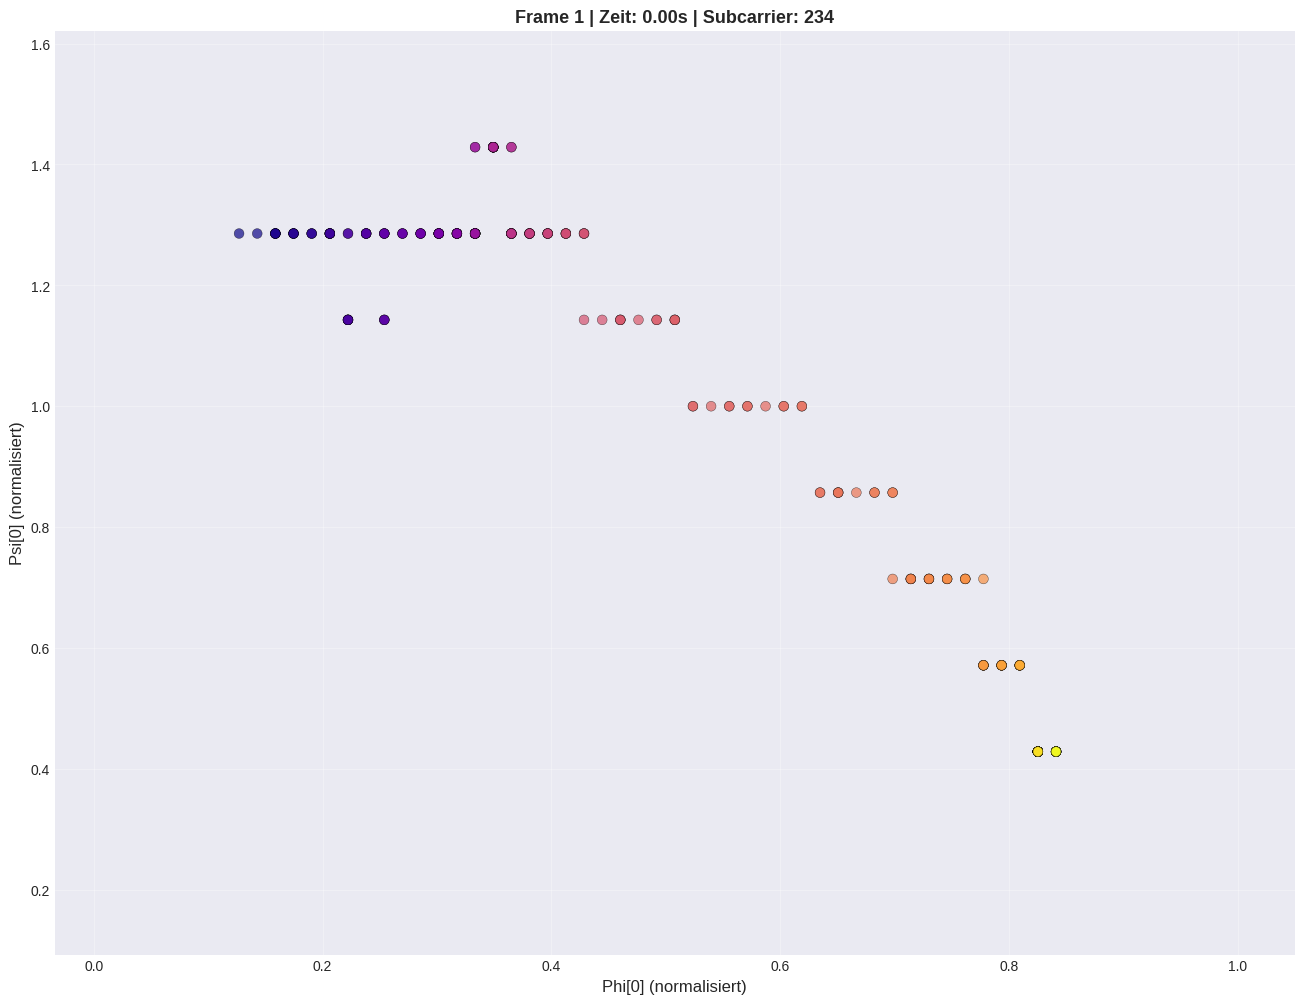

In [27]:
# Alternative Ansicht: Phi[0] vs Psi[0]
if ffmpeg_available:
    print("Erstelle alternative Animation: Phi[0] vs Psi[0]...")
    
    fig_video2, ax_video2 = plt.subplots(figsize=(16, 12))
    animate_func_video2 = create_animation_frame_func(ax_video2, frames_data, view_type='phi_psi')
    
    anim_video2 = animation.FuncAnimation(
        fig_video2,
        animate_func_video2,
        frames=unique_frames,
        interval=1000,
        repeat=False,
        blit=False
    )
    
    writer2 = FFMpegWriter(fps=1, bitrate=1800, codec='libx264')
    output_file2 = f'{parquet_basename}_animation_phi_psi.mp4'
    
    print(f"Exportiere nach: {output_file2}")
    try:
        anim_video2.save(output_file2, writer=writer2, dpi=100)
        print(f"✓ Video erfolgreich exportiert: {output_file2}")
        print(f"  Dateigröße: {Path(output_file2).stat().st_size / (1024*1024):.2f} MB")
    except Exception as e:
        print(f"✗ Fehler beim Video-Export: {e}")
else:
    print("Video-Export übersprungen: ffmpeg nicht verfügbar")